In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [111]:
import pandas as pd
files = [
    '/content/Surface_Water_Monitoring_Analysis_Data_2022 (2).xlsx',
    '/content/Surface_Water_Data_2023_5 (2).xlsx',
    '/content/Surface_Water__Monitoring_Data_2024_6 (1).xlsx'
]

dataframes = []
for file in files:
    xls = pd.ExcelFile(file)
    for sheet in xls.sheet_names:
        df = pd.read_excel(file, sheet_name=sheet)
        dataframes.append(df)

df = pd.concat(dataframes, ignore_index=True)
df.columns

Index(['S.No.', 'Month', 'Temp', 'pH', 'TDS (mg/l)', 'EC (µS/cm )',
       'DO (mg/l)', 'Chloride (mg/l)', 'Hardness (mg/l)', 'Calcium (mg/l)',
       'Magnesium (mg/l)', 'Alkalinity (mg/l)', 'BOD (mg/l)', 'COD (mg/l)',
       'TC      (MPN/100 ml)', 'FC        (MPN/100 ml)',
       'Fecal Steptococcss (MPN/100 ml)', 'Nitrate-N (mg/l)',
       'Nitrite-N (mg/l)', 'Sulphate (mg/l)', 'Phosphate (mg/l)',
       'Fluoride (mg/l)', 'Sodium (mg/l)', 'Potassium (mg/l)', 'SAR',
       'Designated Best use\n(DBU) Water Quality'],
      dtype='object')

In [112]:
columns = df.columns
duplicate_columns = columns[columns.duplicated()]

print("Duplicate columns:", duplicate_columns.tolist())

Duplicate columns: []


In [113]:
df1 = df.drop(columns = ['S.No.'])
df1.head(n = 5)

Month  Temp    pH TDS (mg/l) EC (µS/cm ) DO (mg/l) Chloride (mg/l)  \
0  Jan-22  06°C  7.43       36.0        58.0      10.2             7.0   
1  Feb-22  06°C  7.51       46.0        72.0      10.2             9.0   
2  Mar-22  11°C   7.3       41.0        64.0      10.6             6.0   
3  Apr-22  08°C  7.23       27.0        41.0        11             6.0   
4  May-22  07°C  7.05       25.0        43.0      10.6             5.0   

  Hardness (mg/l) Calcium (mg/l) Magnesium (mg/l)  ...  \
0            88.0           60.0             28.0  ...   
1            54.0           30.0             24.0  ...   
2            45.0           28.0             17.0  ...   
3            36.0           22.0             14.0  ...   
4            32.0           18.0             14.0  ...   

  Fecal Steptococcss (MPN/100 ml) Nitrate-N (mg/l) Nitrite-N (mg/l)  \
0                              ND             0.05             0.02   
1                              ND             0.02             0.03   
2                              ND             0.07            0.007   
3                              ND             0.04            0.006   
4                              ND             0.06             0.03   

  Sulphate (mg/l) Phosphate (mg/l) Fluoride (mg/l) Sodium (mg/l)  \
0           37.24              0.1            0.28          10.2   
1           17.63             0.08            0.28           9.8   
2           17.83             0.14             0.2          10.5   
3           16.11             0.17            0.22          12.2   
4           33.26             0.17            0.15           1.9   

  Potassium (mg/l)   SAR Designated Best use\n(DBU) Water Quality  
0              1.1  0.47                                        A  
1              1.0  0.57                                        A  
2              1.0  0.67                                        A  
3              0.9  0.88                                        A  
4              1.7  0.14                                        A  

[5 rows x 25 columns]

<Axes: >

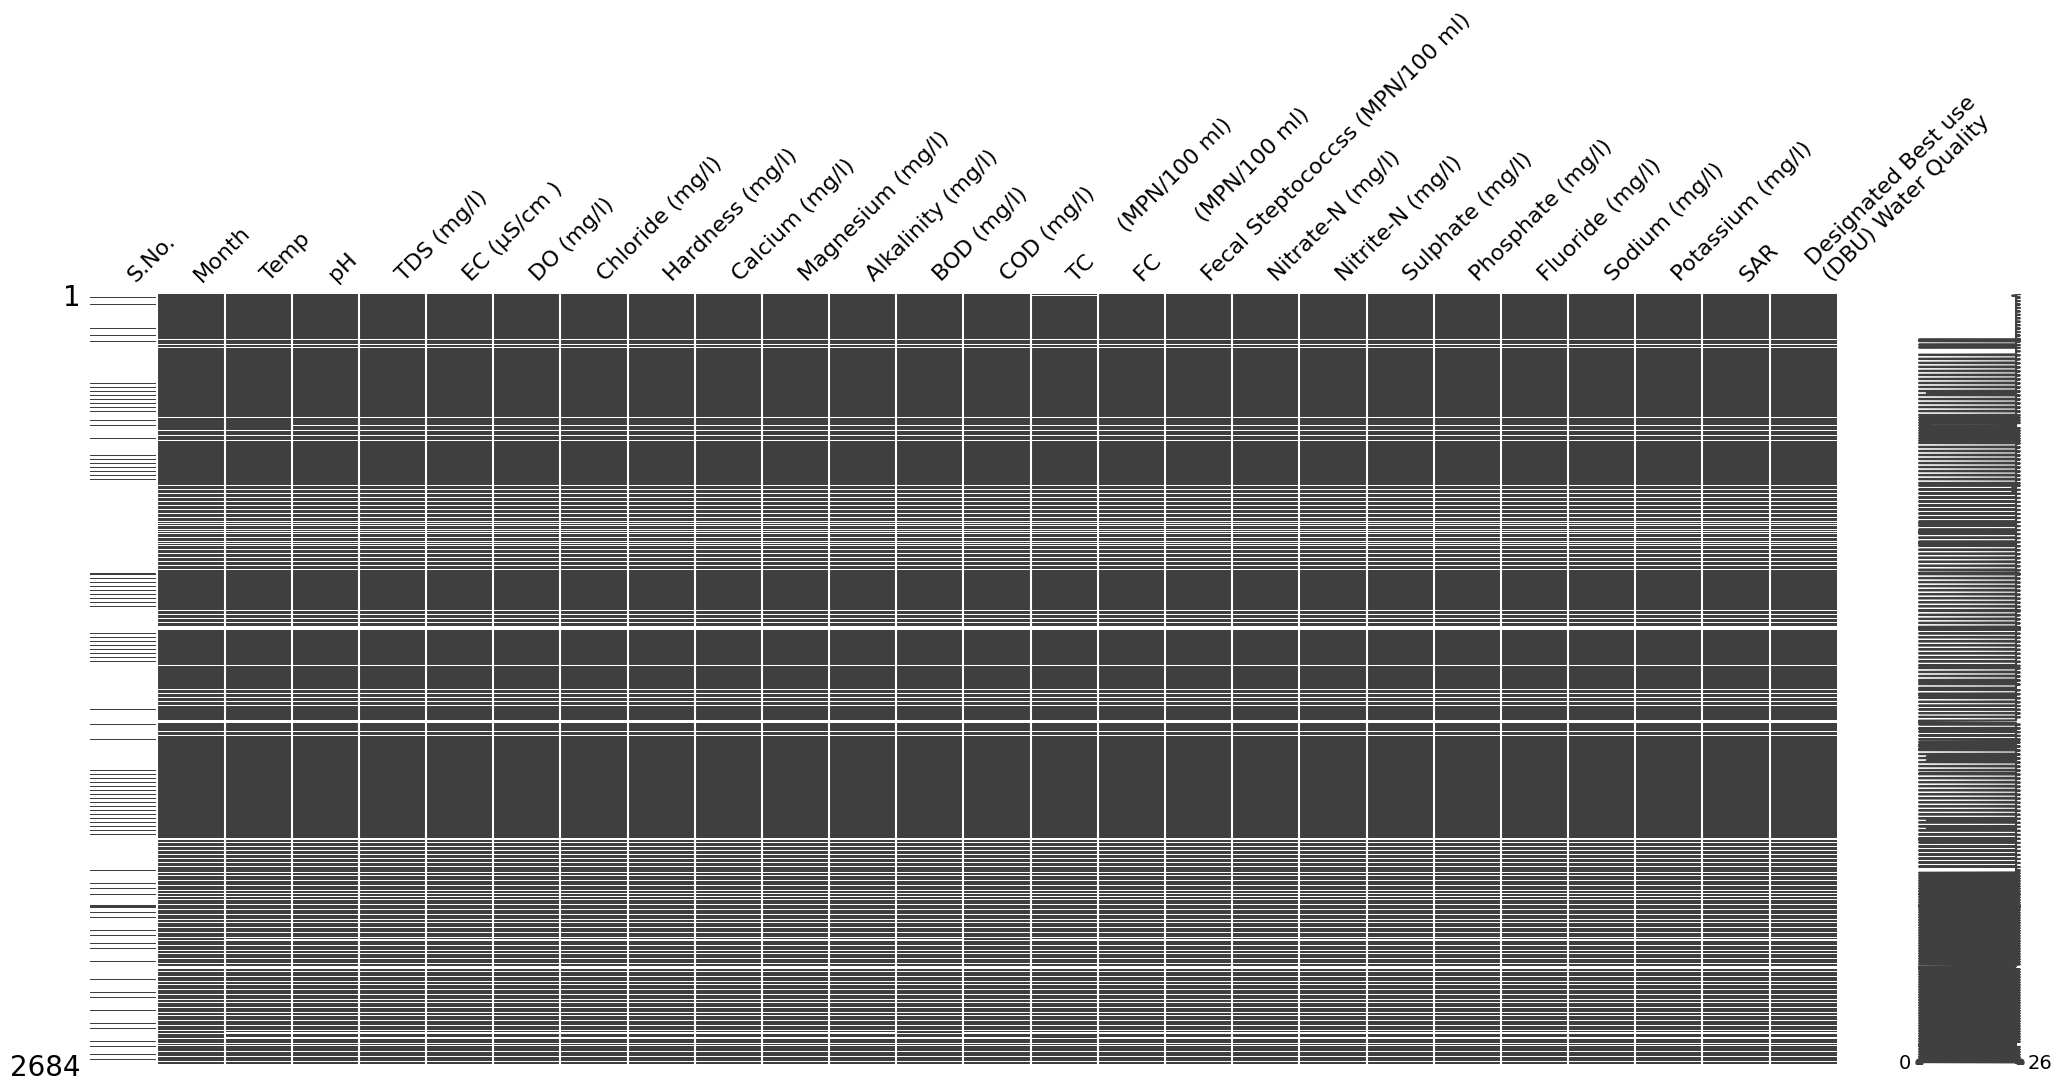

In [114]:
msno.matrix(df)

In [115]:
df1.isnull().sum()

Month                                       446
Temp                                        454
pH                                          461
TDS (mg/l)                                  462
EC (µS/cm )                                 462
DO (mg/l)                                   462
Chloride (mg/l)                             462
Hardness (mg/l)                             462
Calcium (mg/l)                              462
Magnesium (mg/l)                            462
Alkalinity (mg/l)                           462
BOD (mg/l)                                  459
COD (mg/l)                                  460
TC      (MPN/100 ml)                        462
FC        (MPN/100 ml)                      464
Fecal Steptococcss (MPN/100 ml)             462
Nitrate-N (mg/l)                            462
Nitrite-N (mg/l)                            462
Sulphate (mg/l)                             462
Phosphate (mg/l)                            462
Fluoride (mg/l)                             462
Sodium (mg/l)                               462
Potassium (mg/l)                            462
SAR                                         462
Designated Best use\n(DBU) Water Quality    462
dtype: int64

In [116]:
df = df1.dropna()
df.isnull().sum()

Month                                       0
Temp                                        0
pH                                          0
TDS (mg/l)                                  0
EC (µS/cm )                                 0
DO (mg/l)                                   0
Chloride (mg/l)                             0
Hardness (mg/l)                             0
Calcium (mg/l)                              0
Magnesium (mg/l)                            0
Alkalinity (mg/l)                           0
BOD (mg/l)                                  0
COD (mg/l)                                  0
TC      (MPN/100 ml)                        0
FC        (MPN/100 ml)                      0
Fecal Steptococcss (MPN/100 ml)             0
Nitrate-N (mg/l)                            0
Nitrite-N (mg/l)                            0
Sulphate (mg/l)                             0
Phosphate (mg/l)                            0
Fluoride (mg/l)                             0
Sodium (mg/l)                               0
Potassium (mg/l)                            0
SAR                                         0
Designated Best use\n(DBU) Water Quality    0
dtype: int64

In [117]:
df.shape

(2218, 25)

<ipython-input-118-854fbeebf6e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Temp'] = df['Temp'].str.extract(r'(\d+)', expand=False).astype(float)


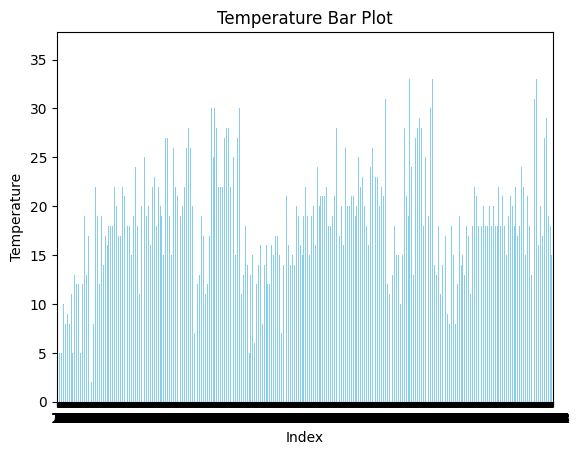

In [118]:
df['Temp'] = df['Temp'].str.extract(r'(\d+)', expand=False).astype(float)
df.plot(y='Temp', kind='bar', legend=False, color='skyblue')
plt.title('Temperature Bar Plot')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.xticks(rotation=0)
plt.show()

In [119]:
df.isnull().sum()

Month                                       0
Temp                                        2
pH                                          0
TDS (mg/l)                                  0
EC (µS/cm )                                 0
DO (mg/l)                                   0
Chloride (mg/l)                             0
Hardness (mg/l)                             0
Calcium (mg/l)                              0
Magnesium (mg/l)                            0
Alkalinity (mg/l)                           0
BOD (mg/l)                                  0
COD (mg/l)                                  0
TC      (MPN/100 ml)                        0
FC        (MPN/100 ml)                      0
Fecal Steptococcss (MPN/100 ml)             0
Nitrate-N (mg/l)                            0
Nitrite-N (mg/l)                            0
Sulphate (mg/l)                             0
Phosphate (mg/l)                            0
Fluoride (mg/l)                             0
Sodium (mg/l)                               0
Potassium (mg/l)                            0
SAR                                         0
Designated Best use\n(DBU) Water Quality    0
dtype: int64

In [120]:
df['Temp'] = df['Temp'].fillna(df['Temp'].mean())
df.isnull().sum()

<ipython-input-120-72f13f9116a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Temp'] = df['Temp'].fillna(df['Temp'].mean())


Month                                       0
Temp                                        0
pH                                          0
TDS (mg/l)                                  0
EC (µS/cm )                                 0
DO (mg/l)                                   0
Chloride (mg/l)                             0
Hardness (mg/l)                             0
Calcium (mg/l)                              0
Magnesium (mg/l)                            0
Alkalinity (mg/l)                           0
BOD (mg/l)                                  0
COD (mg/l)                                  0
TC      (MPN/100 ml)                        0
FC        (MPN/100 ml)                      0
Fecal Steptococcss (MPN/100 ml)             0
Nitrate-N (mg/l)                            0
Nitrite-N (mg/l)                            0
Sulphate (mg/l)                             0
Phosphate (mg/l)                            0
Fluoride (mg/l)                             0
Sodium (mg/l)                               0
Potassium (mg/l)                            0
SAR                                         0
Designated Best use\n(DBU) Water Quality    0
dtype: int64

In [121]:
df['pH'] = pd.to_numeric(df['pH'], errors='coerce')
df['pH'] = df['pH'].astype(float)
df['pH'].dtypes

<ipython-input-121-92e68a9a46bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pH'] = pd.to_numeric(df['pH'], errors='coerce')
<ipython-input-121-92e68a9a46bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pH'] = df['pH'].astype(float)


dtype('float64')

df.replace(['NIL', 'Nil', 'ND', 'Not Detected', 'BDL (<1)'], np.nan, inplace=True)
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)
con = {
    'pH': float,
    'TDS (mg/l)': int,
    'EC (µS/cm )': int,
    'DO (mg/l)': float,
    'Chloride (mg/l)': float,
    'Hardness (mg/l)': int,
    'Calcium (mg/l)': float,
    'Magnesium (mg/l)': float,
    'Alkalinity (mg/l)': int,
    'BOD (mg/l)': float,
    'COD (mg/l)': float,
    'Nitrate-N (mg/l)': float,
    'Nitrite-N (mg/l)': float,
    'Sulphate (mg/l)': float,
    'Phosphate (mg/l)': float,
    'Fluoride (mg/l)': float,
    'Sodium (mg/l)': float,
    'Potassium (mg/l)': float,
    'SAR': float,
}
df.astype(con)
print(df.dtypes)

In [122]:
df['pH'] = df['pH'].fillna(df['pH'].mean())

<ipython-input-122-90da901e4873>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pH'] = df['pH'].fillna(df['pH'].mean())


In [123]:
df['TDS (mg/l)'] = pd.to_numeric(df['TDS (mg/l)'], errors='coerce')
df['TDS (mg/l)'] = df['TDS (mg/l)'].fillna(-1).astype(int)
df.replace(to_replace = -1,value = df['TDS (mg/l)'].mean(),inplace = True)
df.dtypes

<ipython-input-123-b000315692bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TDS (mg/l)'] = pd.to_numeric(df['TDS (mg/l)'], errors='coerce')
<ipython-input-123-b000315692bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TDS (mg/l)'] = df['TDS (mg/l)'].fillna(-1).astype(int)
<ipython-input-123-b000315692bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

Month                                        object
Temp                                        float64
pH                                          float64
TDS (mg/l)                                  float64
EC (µS/cm )                                  object
DO (mg/l)                                    object
Chloride (mg/l)                              object
Hardness (mg/l)                              object
Calcium (mg/l)                               object
Magnesium (mg/l)                             object
Alkalinity (mg/l)                            object
BOD (mg/l)                                   object
COD (mg/l)                                   object
TC      (MPN/100 ml)                         object
FC        (MPN/100 ml)                       object
Fecal Steptococcss (MPN/100 ml)              object
Nitrate-N (mg/l)                             object
Nitrite-N (mg/l)                             object
Sulphate (mg/l)                              object
Phosphate (mg/l)                             object
Fluoride (mg/l)                              object
Sodium (mg/l)                                object
Potassium (mg/l)                             object
SAR                                          object
Designated Best use\n(DBU) Water Quality     object
dtype: object

In [124]:
df['EC (µS/cm )'] = pd.to_numeric(df['EC (µS/cm )'], errors='coerce')
df['EC (µS/cm )'] = df['EC (µS/cm )'].fillna(0).astype(int)
df.replace(to_replace = 0,value = df['EC (µS/cm )'].mean(),inplace = True)
df.dtypes

<ipython-input-124-e7859d385c80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EC (µS/cm )'] = pd.to_numeric(df['EC (µS/cm )'], errors='coerce')
<ipython-input-124-e7859d385c80>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EC (µS/cm )'] = df['EC (µS/cm )'].fillna(0).astype(int)
<ipython-input-124-e7859d385c80>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

Month                                        object
Temp                                        float64
pH                                          float64
TDS (mg/l)                                  float64
EC (µS/cm )                                 float64
DO (mg/l)                                    object
Chloride (mg/l)                              object
Hardness (mg/l)                              object
Calcium (mg/l)                               object
Magnesium (mg/l)                             object
Alkalinity (mg/l)                            object
BOD (mg/l)                                   object
COD (mg/l)                                   object
TC      (MPN/100 ml)                         object
FC        (MPN/100 ml)                       object
Fecal Steptococcss (MPN/100 ml)              object
Nitrate-N (mg/l)                             object
Nitrite-N (mg/l)                             object
Sulphate (mg/l)                              object
Phosphate (mg/l)                             object
Fluoride (mg/l)                              object
Sodium (mg/l)                                object
Potassium (mg/l)                             object
SAR                                          object
Designated Best use\n(DBU) Water Quality     object
dtype: object

In [125]:
df['DO (mg/l)'] = pd.to_numeric(df['DO (mg/l)'], errors='coerce')
df['DO (mg/l)'] = df['DO (mg/l)'].fillna(0).astype(float)
df.replace(to_replace = 0,value = df['DO (mg/l)'].mean(),inplace = True)
df.dtypes

<ipython-input-125-bc8b60b0904a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DO (mg/l)'] = pd.to_numeric(df['DO (mg/l)'], errors='coerce')
<ipython-input-125-bc8b60b0904a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DO (mg/l)'] = df['DO (mg/l)'].fillna(0).astype(float)
<ipython-input-125-bc8b60b0904a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

Month                                        object
Temp                                        float64
pH                                          float64
TDS (mg/l)                                  float64
EC (µS/cm )                                 float64
DO (mg/l)                                   float64
Chloride (mg/l)                              object
Hardness (mg/l)                              object
Calcium (mg/l)                               object
Magnesium (mg/l)                             object
Alkalinity (mg/l)                            object
BOD (mg/l)                                   object
COD (mg/l)                                   object
TC      (MPN/100 ml)                         object
FC        (MPN/100 ml)                       object
Fecal Steptococcss (MPN/100 ml)              object
Nitrate-N (mg/l)                             object
Nitrite-N (mg/l)                             object
Sulphate (mg/l)                              object
Phosphate (mg/l)                             object
Fluoride (mg/l)                              object
Sodium (mg/l)                                object
Potassium (mg/l)                             object
SAR                                          object
Designated Best use\n(DBU) Water Quality     object
dtype: object

In [126]:
df['Chloride (mg/l)'] = pd.to_numeric(df['Chloride (mg/l)'], errors='coerce')
df['Chloride (mg/l)'] = df['Chloride (mg/l)'].fillna(-1).astype(float)
df.replace(to_replace = -1,value = df['Chloride (mg/l)'].median(),inplace = True)
df.dtypes

<ipython-input-126-dc205857db8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Chloride (mg/l)'] = pd.to_numeric(df['Chloride (mg/l)'], errors='coerce')
<ipython-input-126-dc205857db8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Chloride (mg/l)'] = df['Chloride (mg/l)'].fillna(-1).astype(float)
<ipython-input-126-dc205857db8d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

Month                                        object
Temp                                        float64
pH                                          float64
TDS (mg/l)                                  float64
EC (µS/cm )                                 float64
DO (mg/l)                                   float64
Chloride (mg/l)                             float64
Hardness (mg/l)                              object
Calcium (mg/l)                               object
Magnesium (mg/l)                             object
Alkalinity (mg/l)                            object
BOD (mg/l)                                   object
COD (mg/l)                                   object
TC      (MPN/100 ml)                         object
FC        (MPN/100 ml)                       object
Fecal Steptococcss (MPN/100 ml)              object
Nitrate-N (mg/l)                             object
Nitrite-N (mg/l)                             object
Sulphate (mg/l)                              object
Phosphate (mg/l)                             object
Fluoride (mg/l)                              object
Sodium (mg/l)                                object
Potassium (mg/l)                             object
SAR                                          object
Designated Best use\n(DBU) Water Quality     object
dtype: object

In [127]:
df['Hardness (mg/l)'] = pd.to_numeric(df['Hardness (mg/l)'], errors='coerce')
df['Hardness (mg/l)'] = df['Hardness (mg/l)'].fillna(-1).astype(float)
df.replace(to_replace = -1,value = df['Hardness (mg/l)'].median(),inplace = True)
df.dtypes

<ipython-input-127-ab0366ea8ffb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hardness (mg/l)'] = pd.to_numeric(df['Hardness (mg/l)'], errors='coerce')
<ipython-input-127-ab0366ea8ffb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hardness (mg/l)'] = df['Hardness (mg/l)'].fillna(-1).astype(float)
<ipython-input-127-ab0366ea8ffb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

Month                                        object
Temp                                        float64
pH                                          float64
TDS (mg/l)                                  float64
EC (µS/cm )                                 float64
DO (mg/l)                                   float64
Chloride (mg/l)                             float64
Hardness (mg/l)                             float64
Calcium (mg/l)                               object
Magnesium (mg/l)                             object
Alkalinity (mg/l)                            object
BOD (mg/l)                                   object
COD (mg/l)                                   object
TC      (MPN/100 ml)                         object
FC        (MPN/100 ml)                       object
Fecal Steptococcss (MPN/100 ml)              object
Nitrate-N (mg/l)                             object
Nitrite-N (mg/l)                             object
Sulphate (mg/l)                              object
Phosphate (mg/l)                             object
Fluoride (mg/l)                              object
Sodium (mg/l)                                object
Potassium (mg/l)                             object
SAR                                          object
Designated Best use\n(DBU) Water Quality     object
dtype: object

In [128]:
df['Calcium (mg/l)'] = pd.to_numeric(df['Calcium (mg/l)'], errors='coerce')
df['Calcium (mg/l)'] = df['Calcium (mg/l)'].fillna(-1).astype(int)
df.replace(to_replace = -1,value = df['Calcium (mg/l)'].median(),inplace = True)
df.dtypes

<ipython-input-128-8b9f977cef6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Calcium (mg/l)'] = pd.to_numeric(df['Calcium (mg/l)'], errors='coerce')
<ipython-input-128-8b9f977cef6d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Calcium (mg/l)'] = df['Calcium (mg/l)'].fillna(-1).astype(int)
<ipython-input-128-8b9f977cef6d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

Month                                        object
Temp                                        float64
pH                                          float64
TDS (mg/l)                                  float64
EC (µS/cm )                                 float64
DO (mg/l)                                   float64
Chloride (mg/l)                             float64
Hardness (mg/l)                             float64
Calcium (mg/l)                                int64
Magnesium (mg/l)                             object
Alkalinity (mg/l)                            object
BOD (mg/l)                                   object
COD (mg/l)                                   object
TC      (MPN/100 ml)                         object
FC        (MPN/100 ml)                       object
Fecal Steptococcss (MPN/100 ml)              object
Nitrate-N (mg/l)                             object
Nitrite-N (mg/l)                             object
Sulphate (mg/l)                              object
Phosphate (mg/l)                             object
Fluoride (mg/l)                              object
Sodium (mg/l)                                object
Potassium (mg/l)                             object
SAR                                          object
Designated Best use\n(DBU) Water Quality     object
dtype: object

In [129]:
df['Magnesium (mg/l)'] = pd.to_numeric(df['Magnesium (mg/l)'], errors='coerce')
df['Magnesium (mg/l)'] = df['Magnesium (mg/l)'].fillna(-1).astype(int)
df.replace(to_replace = -1,value = df['Magnesium (mg/l)'].median(),inplace = True)
df.dtypes

<ipython-input-129-8aefc7d44cfd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Magnesium (mg/l)'] = pd.to_numeric(df['Magnesium (mg/l)'], errors='coerce')
<ipython-input-129-8aefc7d44cfd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Magnesium (mg/l)'] = df['Magnesium (mg/l)'].fillna(-1).astype(int)
<ipython-input-129-8aefc7d44cfd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

Month                                        object
Temp                                        float64
pH                                          float64
TDS (mg/l)                                  float64
EC (µS/cm )                                 float64
DO (mg/l)                                   float64
Chloride (mg/l)                             float64
Hardness (mg/l)                             float64
Calcium (mg/l)                                int64
Magnesium (mg/l)                              int64
Alkalinity (mg/l)                            object
BOD (mg/l)                                   object
COD (mg/l)                                   object
TC      (MPN/100 ml)                         object
FC        (MPN/100 ml)                       object
Fecal Steptococcss (MPN/100 ml)              object
Nitrate-N (mg/l)                             object
Nitrite-N (mg/l)                             object
Sulphate (mg/l)                              object
Phosphate (mg/l)                             object
Fluoride (mg/l)                              object
Sodium (mg/l)                                object
Potassium (mg/l)                             object
SAR                                          object
Designated Best use\n(DBU) Water Quality     object
dtype: object

In [130]:
df['Alkalinity (mg/l)'] = pd.to_numeric(df['Alkalinity (mg/l)'], errors='coerce')
df['Alkalinity (mg/l)'] = df['Alkalinity (mg/l)'].fillna(-1).astype(int)
df.replace(to_replace = -1,value = df['Alkalinity (mg/l)'].mean(),inplace = True)
df.dtypes

<ipython-input-130-8882c7313fce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Alkalinity (mg/l)'] = pd.to_numeric(df['Alkalinity (mg/l)'], errors='coerce')
<ipython-input-130-8882c7313fce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Alkalinity (mg/l)'] = df['Alkalinity (mg/l)'].fillna(-1).astype(int)
<ipython-input-130-8882c7313fce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

Month                                        object
Temp                                        float64
pH                                          float64
TDS (mg/l)                                  float64
EC (µS/cm )                                 float64
DO (mg/l)                                   float64
Chloride (mg/l)                             float64
Hardness (mg/l)                             float64
Calcium (mg/l)                                int64
Magnesium (mg/l)                              int64
Alkalinity (mg/l)                           float64
BOD (mg/l)                                   object
COD (mg/l)                                   object
TC      (MPN/100 ml)                         object
FC        (MPN/100 ml)                       object
Fecal Steptococcss (MPN/100 ml)              object
Nitrate-N (mg/l)                             object
Nitrite-N (mg/l)                             object
Sulphate (mg/l)                              object
Phosphate (mg/l)                             object
Fluoride (mg/l)                              object
Sodium (mg/l)                                object
Potassium (mg/l)                             object
SAR                                          object
Designated Best use\n(DBU) Water Quality     object
dtype: object

In [131]:
df['BOD (mg/l)'] = pd.to_numeric(df['BOD (mg/l)'], errors='coerce')
df['BOD (mg/l)'] = df['BOD (mg/l)'].fillna(-1).astype(float)
df.replace(to_replace = -1,value = df['BOD (mg/l)'].mean(),inplace = True)
df.dtypes

<ipython-input-131-0c19b733df63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BOD (mg/l)'] = pd.to_numeric(df['BOD (mg/l)'], errors='coerce')
<ipython-input-131-0c19b733df63>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BOD (mg/l)'] = df['BOD (mg/l)'].fillna(-1).astype(float)
<ipython-input-131-0c19b733df63>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

Month                                        object
Temp                                        float64
pH                                          float64
TDS (mg/l)                                  float64
EC (µS/cm )                                 float64
DO (mg/l)                                   float64
Chloride (mg/l)                             float64
Hardness (mg/l)                             float64
Calcium (mg/l)                                int64
Magnesium (mg/l)                              int64
Alkalinity (mg/l)                           float64
BOD (mg/l)                                  float64
COD (mg/l)                                   object
TC      (MPN/100 ml)                         object
FC        (MPN/100 ml)                       object
Fecal Steptococcss (MPN/100 ml)              object
Nitrate-N (mg/l)                             object
Nitrite-N (mg/l)                             object
Sulphate (mg/l)                              object
Phosphate (mg/l)                             object
Fluoride (mg/l)                              object
Sodium (mg/l)                                object
Potassium (mg/l)                             object
SAR                                          object
Designated Best use\n(DBU) Water Quality     object
dtype: object

In [132]:
df['COD (mg/l)'] = pd.to_numeric(df['COD (mg/l)'], errors='coerce')
df['COD (mg/l)'] = df['COD (mg/l)'].fillna(-1).astype(float)
df.replace(to_replace = -1,value = df['COD (mg/l)'].mean(),inplace = True)
df.dtypes

<ipython-input-132-b44fb0b99ed9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['COD (mg/l)'] = pd.to_numeric(df['COD (mg/l)'], errors='coerce')
<ipython-input-132-b44fb0b99ed9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['COD (mg/l)'] = df['COD (mg/l)'].fillna(-1).astype(float)
<ipython-input-132-b44fb0b99ed9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

Month                                        object
Temp                                        float64
pH                                          float64
TDS (mg/l)                                  float64
EC (µS/cm )                                 float64
DO (mg/l)                                   float64
Chloride (mg/l)                             float64
Hardness (mg/l)                             float64
Calcium (mg/l)                                int64
Magnesium (mg/l)                              int64
Alkalinity (mg/l)                           float64
BOD (mg/l)                                  float64
COD (mg/l)                                  float64
TC      (MPN/100 ml)                         object
FC        (MPN/100 ml)                       object
Fecal Steptococcss (MPN/100 ml)              object
Nitrate-N (mg/l)                             object
Nitrite-N (mg/l)                             object
Sulphate (mg/l)                              object
Phosphate (mg/l)                             object
Fluoride (mg/l)                              object
Sodium (mg/l)                                object
Potassium (mg/l)                             object
SAR                                          object
Designated Best use\n(DBU) Water Quality     object
dtype: object

In [133]:
df.columns

Index(['Month', 'Temp', 'pH', 'TDS (mg/l)', 'EC (µS/cm )', 'DO (mg/l)',
       'Chloride (mg/l)', 'Hardness (mg/l)', 'Calcium (mg/l)',
       'Magnesium (mg/l)', 'Alkalinity (mg/l)', 'BOD (mg/l)', 'COD (mg/l)',
       'TC      (MPN/100 ml)', 'FC        (MPN/100 ml)',
       'Fecal Steptococcss (MPN/100 ml)', 'Nitrate-N (mg/l)',
       'Nitrite-N (mg/l)', 'Sulphate (mg/l)', 'Phosphate (mg/l)',
       'Fluoride (mg/l)', 'Sodium (mg/l)', 'Potassium (mg/l)', 'SAR',
       'Designated Best use\n(DBU) Water Quality'],
      dtype='object')

In [134]:
df['TC      (MPN/100 ml)'].unique()

array(['<2', '<1.8', 32, 34, 31, 33, 38, 40, 43, 47, 48, 41, 24, 23, 22,
       26, 46, 49, 39, 10, 12, 17, 25, 27, 63, 58, 70, 79, 84, 94,
       '≥1600', 9200, 8400, 78, 110, 120, 130, 1600, 210, 350, 16000,
       7000, 4600, 1700, 280000, 220, 540, 4700, 35000, 2100, 1400, 140,
       170, 280, 150, 240, 900, 430, 920, 1.8, 2, 21, 4, 6.1, 4.5, 6.8, 6,
       6300, 17000, '>1600', 160000, '28×102', '35×102', 92000, '22×102',
       '21×102', '14×102', 180, '17×102', 'TC      (MPN/100 ml)',
       '13×102'], dtype=object)

In [135]:
df.rename(columns={'TC      (MPN/100 ml)': 'TC (MPN/100 ml)', 'FC        (MPN/100 ml)': 'FC (MPN/100 ml)', 'Fecal Steptococcss (MPN/100 ml)': 'Fecal Steptococcss (MPN/100 ml)'}, inplace=True)
df['TC (MPN/100 ml)'] = df['TC (MPN/100 ml)'].replace(r'<.*', '', regex=True)
df['TC (MPN/100 ml)'] = pd.to_numeric(df['TC (MPN/100 ml)'], errors='coerce')
df['TC (MPN/100 ml)'] = df['TC (MPN/100 ml)'].fillna(-1).astype(float)
df.dtypes

<ipython-input-135-a87810c69972>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'TC      (MPN/100 ml)': 'TC (MPN/100 ml)', 'FC        (MPN/100 ml)': 'FC (MPN/100 ml)', 'Fecal Steptococcss (MPN/100 ml)': 'Fecal Steptococcss (MPN/100 ml)'}, inplace=True)
<ipython-input-135-a87810c69972>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TC (MPN/100 ml)'] = df['TC (MPN/100 ml)'].replace(r'<.*', '', regex=True)
<ipython-input-135-a87810c69972>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

Month                                        object
Temp                                        float64
pH                                          float64
TDS (mg/l)                                  float64
EC (µS/cm )                                 float64
DO (mg/l)                                   float64
Chloride (mg/l)                             float64
Hardness (mg/l)                             float64
Calcium (mg/l)                                int64
Magnesium (mg/l)                              int64
Alkalinity (mg/l)                           float64
BOD (mg/l)                                  float64
COD (mg/l)                                  float64
TC (MPN/100 ml)                             float64
FC (MPN/100 ml)                              object
Fecal Steptococcss (MPN/100 ml)              object
Nitrate-N (mg/l)                             object
Nitrite-N (mg/l)                             object
Sulphate (mg/l)                              object
Phosphate (mg/l)                             object
Fluoride (mg/l)                              object
Sodium (mg/l)                                object
Potassium (mg/l)                             object
SAR                                          object
Designated Best use\n(DBU) Water Quality     object
dtype: object

In [136]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df[['TC (MPN/100 ml)']] = imputer.fit_transform(df[['TC (MPN/100 ml)']])
print(df['TC (MPN/100 ml)'].isna().sum())

0


<ipython-input-136-3e1e0f14866d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['TC (MPN/100 ml)']] = imputer.fit_transform(df[['TC (MPN/100 ml)']])


In [137]:
df['FC (MPN/100 ml)'].unique()

array(['<2', '<1.8', 14, 17, 13, 20, 21, 22, 26, 27, 12, 15, 33, 31, 24,
       6.1, 8.2, 10, 32, 7.8, 8.3, 9.1, 23, 25, 39, 41, 38, 34, 48, 43,
       40, 47, 58, 46, '≥1600', 4700, 4800, 49, 63, 69, 70, 79, 84, 920,
       170, 280, 480, 3900, 2300, 1100, 170000, 140, 350, 3300, 1300, 11,
       110, 120, 130, 94, 30, 210, 220, 240, 430, 540, 150, 500, 1.8, 4,
       2, 4.5, 4100, 6300, 14000, '>1600', 28000, 5400, 1700, 9200,
       '17×102', '14×102', 17000, 1600, 3500, 92000, '11×102', '22×102',
       'FC        (MPN/100 ml)', '13×102', '28×102'], dtype=object)

In [138]:
df['FC (MPN/100 ml)'] = df['FC (MPN/100 ml)'].replace(r'<.*', '', regex=True)
df['FC (MPN/100 ml)'] = pd.to_numeric(df['FC (MPN/100 ml)'], errors='coerce')
df['FC (MPN/100 ml)'] = df['FC (MPN/100 ml)'].fillna(-1).astype(float)
df.dtypes

<ipython-input-138-f60776a38f93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FC (MPN/100 ml)'] = df['FC (MPN/100 ml)'].replace(r'<.*', '', regex=True)
<ipython-input-138-f60776a38f93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FC (MPN/100 ml)'] = pd.to_numeric(df['FC (MPN/100 ml)'], errors='coerce')
<ipython-input-138-f60776a38f93>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

Month                                        object
Temp                                        float64
pH                                          float64
TDS (mg/l)                                  float64
EC (µS/cm )                                 float64
DO (mg/l)                                   float64
Chloride (mg/l)                             float64
Hardness (mg/l)                             float64
Calcium (mg/l)                                int64
Magnesium (mg/l)                              int64
Alkalinity (mg/l)                           float64
BOD (mg/l)                                  float64
COD (mg/l)                                  float64
TC (MPN/100 ml)                             float64
FC (MPN/100 ml)                             float64
Fecal Steptococcss (MPN/100 ml)              object
Nitrate-N (mg/l)                             object
Nitrite-N (mg/l)                             object
Sulphate (mg/l)                              object
Phosphate (mg/l)                             object
Fluoride (mg/l)                              object
Sodium (mg/l)                                object
Potassium (mg/l)                             object
SAR                                          object
Designated Best use\n(DBU) Water Quality     object
dtype: object

In [139]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df[['FC (MPN/100 ml)']] = imputer.fit_transform(df[['FC (MPN/100 ml)']])
print(df['FC (MPN/100 ml)'].isna().sum())

0


<ipython-input-139-2e6f588a9c42>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['FC (MPN/100 ml)']] = imputer.fit_transform(df[['FC (MPN/100 ml)']])


In [140]:
df['Fecal Steptococcss (MPN/100 ml)'] = df['FC (MPN/100 ml)'].replace('ND', 0, regex=True)
df['FC (MPN/100 ml)'] = pd.to_numeric(df['FC (MPN/100 ml)'], errors='coerce')
df['FC (MPN/100 ml)'] = df['FC (MPN/100 ml)'].astype(float)
df.dtypes

<ipython-input-140-ec4266ebbcfa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fecal Steptococcss (MPN/100 ml)'] = df['FC (MPN/100 ml)'].replace('ND', 0, regex=True)
<ipython-input-140-ec4266ebbcfa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FC (MPN/100 ml)'] = pd.to_numeric(df['FC (MPN/100 ml)'], errors='coerce')
<ipython-input-140-ec4266ebbcfa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

Month                                        object
Temp                                        float64
pH                                          float64
TDS (mg/l)                                  float64
EC (µS/cm )                                 float64
DO (mg/l)                                   float64
Chloride (mg/l)                             float64
Hardness (mg/l)                             float64
Calcium (mg/l)                                int64
Magnesium (mg/l)                              int64
Alkalinity (mg/l)                           float64
BOD (mg/l)                                  float64
COD (mg/l)                                  float64
TC (MPN/100 ml)                             float64
FC (MPN/100 ml)                             float64
Fecal Steptococcss (MPN/100 ml)             float64
Nitrate-N (mg/l)                             object
Nitrite-N (mg/l)                             object
Sulphate (mg/l)                              object
Phosphate (mg/l)                             object
Fluoride (mg/l)                              object
Sodium (mg/l)                                object
Potassium (mg/l)                             object
SAR                                          object
Designated Best use\n(DBU) Water Quality     object
dtype: object

In [141]:
df['Nitrate-N (mg/l)'] = pd.to_numeric(df['Nitrate-N (mg/l)'], errors='coerce')
df['Nitrate-N (mg/l)'] = df['Nitrate-N (mg/l)'].fillna(-1).astype(float)
df.replace(to_replace = -1,value = df['Nitrate-N (mg/l)'].mean(),inplace = True)
df.dtypes

<ipython-input-141-cbd96b3e1a59>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Nitrate-N (mg/l)'] = pd.to_numeric(df['Nitrate-N (mg/l)'], errors='coerce')
<ipython-input-141-cbd96b3e1a59>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Nitrate-N (mg/l)'] = df['Nitrate-N (mg/l)'].fillna(-1).astype(float)
<ipython-input-141-cbd96b3e1a59>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

Month                                        object
Temp                                        float64
pH                                          float64
TDS (mg/l)                                  float64
EC (µS/cm )                                 float64
DO (mg/l)                                   float64
Chloride (mg/l)                             float64
Hardness (mg/l)                             float64
Calcium (mg/l)                                int64
Magnesium (mg/l)                              int64
Alkalinity (mg/l)                           float64
BOD (mg/l)                                  float64
COD (mg/l)                                  float64
TC (MPN/100 ml)                             float64
FC (MPN/100 ml)                             float64
Fecal Steptococcss (MPN/100 ml)             float64
Nitrate-N (mg/l)                            float64
Nitrite-N (mg/l)                             object
Sulphate (mg/l)                              object
Phosphate (mg/l)                             object
Fluoride (mg/l)                              object
Sodium (mg/l)                                object
Potassium (mg/l)                             object
SAR                                          object
Designated Best use\n(DBU) Water Quality     object
dtype: object

In [142]:
df['Nitrite-N (mg/l)'] = pd.to_numeric(df['Nitrite-N (mg/l)'], errors='coerce')
df['Nitrite-N (mg/l)'] = df['Nitrite-N (mg/l)'].fillna(-1).astype(float)
df.replace(to_replace = -1,value = df['Nitrite-N (mg/l)'].mean(),inplace = True)
df.dtypes

<ipython-input-142-b416e79bcba2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Nitrite-N (mg/l)'] = pd.to_numeric(df['Nitrite-N (mg/l)'], errors='coerce')
<ipython-input-142-b416e79bcba2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Nitrite-N (mg/l)'] = df['Nitrite-N (mg/l)'].fillna(-1).astype(float)
<ipython-input-142-b416e79bcba2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

Month                                        object
Temp                                        float64
pH                                          float64
TDS (mg/l)                                  float64
EC (µS/cm )                                 float64
DO (mg/l)                                   float64
Chloride (mg/l)                             float64
Hardness (mg/l)                             float64
Calcium (mg/l)                                int64
Magnesium (mg/l)                              int64
Alkalinity (mg/l)                           float64
BOD (mg/l)                                  float64
COD (mg/l)                                  float64
TC (MPN/100 ml)                             float64
FC (MPN/100 ml)                             float64
Fecal Steptococcss (MPN/100 ml)             float64
Nitrate-N (mg/l)                            float64
Nitrite-N (mg/l)                            float64
Sulphate (mg/l)                              object
Phosphate (mg/l)                             object
Fluoride (mg/l)                              object
Sodium (mg/l)                                object
Potassium (mg/l)                             object
SAR                                          object
Designated Best use\n(DBU) Water Quality     object
dtype: object

In [143]:
df['Sulphate (mg/l)'] = pd.to_numeric(df['Sulphate (mg/l)'], errors='coerce')
df['Sulphate (mg/l)'] = df['Sulphate (mg/l)'].fillna(-1).astype(float)
df.replace(to_replace = -1,value = df['Sulphate (mg/l)'].mean(),inplace = True)
df.dtypes

<ipython-input-143-8624670f2de2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sulphate (mg/l)'] = pd.to_numeric(df['Sulphate (mg/l)'], errors='coerce')
<ipython-input-143-8624670f2de2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sulphate (mg/l)'] = df['Sulphate (mg/l)'].fillna(-1).astype(float)
<ipython-input-143-8624670f2de2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

Month                                        object
Temp                                        float64
pH                                          float64
TDS (mg/l)                                  float64
EC (µS/cm )                                 float64
DO (mg/l)                                   float64
Chloride (mg/l)                             float64
Hardness (mg/l)                             float64
Calcium (mg/l)                                int64
Magnesium (mg/l)                              int64
Alkalinity (mg/l)                           float64
BOD (mg/l)                                  float64
COD (mg/l)                                  float64
TC (MPN/100 ml)                             float64
FC (MPN/100 ml)                             float64
Fecal Steptococcss (MPN/100 ml)             float64
Nitrate-N (mg/l)                            float64
Nitrite-N (mg/l)                            float64
Sulphate (mg/l)                             float64
Phosphate (mg/l)                             object
Fluoride (mg/l)                              object
Sodium (mg/l)                                object
Potassium (mg/l)                             object
SAR                                          object
Designated Best use\n(DBU) Water Quality     object
dtype: object

In [144]:
df['Phosphate (mg/l)'] = pd.to_numeric(df['Phosphate (mg/l)'], errors='coerce')
df['Phosphate (mg/l)'] = df['Phosphate (mg/l)'].fillna(-1).astype(float)
df.replace(to_replace = -1,value = df['Phosphate (mg/l)'].mean(),inplace = True)
df.dtypes

<ipython-input-144-4e7d85f104a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Phosphate (mg/l)'] = pd.to_numeric(df['Phosphate (mg/l)'], errors='coerce')
<ipython-input-144-4e7d85f104a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Phosphate (mg/l)'] = df['Phosphate (mg/l)'].fillna(-1).astype(float)
<ipython-input-144-4e7d85f104a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

Month                                        object
Temp                                        float64
pH                                          float64
TDS (mg/l)                                  float64
EC (µS/cm )                                 float64
DO (mg/l)                                   float64
Chloride (mg/l)                             float64
Hardness (mg/l)                             float64
Calcium (mg/l)                                int64
Magnesium (mg/l)                              int64
Alkalinity (mg/l)                           float64
BOD (mg/l)                                  float64
COD (mg/l)                                  float64
TC (MPN/100 ml)                             float64
FC (MPN/100 ml)                             float64
Fecal Steptococcss (MPN/100 ml)             float64
Nitrate-N (mg/l)                            float64
Nitrite-N (mg/l)                            float64
Sulphate (mg/l)                             float64
Phosphate (mg/l)                            float64
Fluoride (mg/l)                              object
Sodium (mg/l)                                object
Potassium (mg/l)                             object
SAR                                          object
Designated Best use\n(DBU) Water Quality     object
dtype: object

In [145]:
df['Fluoride (mg/l)'] = pd.to_numeric(df['Fluoride (mg/l)'], errors='coerce')
df['Fluoride (mg/l)'] = df['Fluoride (mg/l)'].fillna(-1).astype(float)
df.replace(to_replace = -1,value = df['Fluoride (mg/l)'].mean(),inplace = True)
df.dtypes

<ipython-input-145-46942e0834ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fluoride (mg/l)'] = pd.to_numeric(df['Fluoride (mg/l)'], errors='coerce')
<ipython-input-145-46942e0834ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fluoride (mg/l)'] = df['Fluoride (mg/l)'].fillna(-1).astype(float)
<ipython-input-145-46942e0834ce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

Month                                        object
Temp                                        float64
pH                                          float64
TDS (mg/l)                                  float64
EC (µS/cm )                                 float64
DO (mg/l)                                   float64
Chloride (mg/l)                             float64
Hardness (mg/l)                             float64
Calcium (mg/l)                                int64
Magnesium (mg/l)                              int64
Alkalinity (mg/l)                           float64
BOD (mg/l)                                  float64
COD (mg/l)                                  float64
TC (MPN/100 ml)                             float64
FC (MPN/100 ml)                             float64
Fecal Steptococcss (MPN/100 ml)             float64
Nitrate-N (mg/l)                            float64
Nitrite-N (mg/l)                            float64
Sulphate (mg/l)                             float64
Phosphate (mg/l)                            float64
Fluoride (mg/l)                             float64
Sodium (mg/l)                                object
Potassium (mg/l)                             object
SAR                                          object
Designated Best use\n(DBU) Water Quality     object
dtype: object

In [146]:
df['Sodium (mg/l)'] = pd.to_numeric(df['Sodium (mg/l)'], errors='coerce')
df['Sodium (mg/l)'] = df['Sodium (mg/l)'].fillna(-1).astype(float)
df.replace(to_replace = -1,value = df['Sodium (mg/l)'].mean(),inplace = True)
df.dtypes

<ipython-input-146-4d31ebc26477>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sodium (mg/l)'] = pd.to_numeric(df['Sodium (mg/l)'], errors='coerce')
<ipython-input-146-4d31ebc26477>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sodium (mg/l)'] = df['Sodium (mg/l)'].fillna(-1).astype(float)
<ipython-input-146-4d31ebc26477>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

Month                                        object
Temp                                        float64
pH                                          float64
TDS (mg/l)                                  float64
EC (µS/cm )                                 float64
DO (mg/l)                                   float64
Chloride (mg/l)                             float64
Hardness (mg/l)                             float64
Calcium (mg/l)                                int64
Magnesium (mg/l)                              int64
Alkalinity (mg/l)                           float64
BOD (mg/l)                                  float64
COD (mg/l)                                  float64
TC (MPN/100 ml)                             float64
FC (MPN/100 ml)                             float64
Fecal Steptococcss (MPN/100 ml)             float64
Nitrate-N (mg/l)                            float64
Nitrite-N (mg/l)                            float64
Sulphate (mg/l)                             float64
Phosphate (mg/l)                            float64
Fluoride (mg/l)                             float64
Sodium (mg/l)                               float64
Potassium (mg/l)                             object
SAR                                          object
Designated Best use\n(DBU) Water Quality     object
dtype: object

In [147]:
df['Potassium (mg/l)'] = pd.to_numeric(df['Potassium (mg/l)'], errors='coerce')
df['Potassium (mg/l)'] = df['Potassium (mg/l)'].fillna(-1).astype(float)
df.replace(to_replace = -1,value = df['Potassium (mg/l)'].mean(),inplace = True)
df.dtypes

<ipython-input-147-b8174f84c428>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Potassium (mg/l)'] = pd.to_numeric(df['Potassium (mg/l)'], errors='coerce')
<ipython-input-147-b8174f84c428>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Potassium (mg/l)'] = df['Potassium (mg/l)'].fillna(-1).astype(float)
<ipython-input-147-b8174f84c428>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

Month                                        object
Temp                                        float64
pH                                          float64
TDS (mg/l)                                  float64
EC (µS/cm )                                 float64
DO (mg/l)                                   float64
Chloride (mg/l)                             float64
Hardness (mg/l)                             float64
Calcium (mg/l)                                int64
Magnesium (mg/l)                              int64
Alkalinity (mg/l)                           float64
BOD (mg/l)                                  float64
COD (mg/l)                                  float64
TC (MPN/100 ml)                             float64
FC (MPN/100 ml)                             float64
Fecal Steptococcss (MPN/100 ml)             float64
Nitrate-N (mg/l)                            float64
Nitrite-N (mg/l)                            float64
Sulphate (mg/l)                             float64
Phosphate (mg/l)                            float64
Fluoride (mg/l)                             float64
Sodium (mg/l)                               float64
Potassium (mg/l)                            float64
SAR                                          object
Designated Best use\n(DBU) Water Quality     object
dtype: object

In [148]:
df['SAR'] = pd.to_numeric(df['SAR'], errors='coerce')
df['SAR'] = df['SAR'].fillna(-1).astype(float)
df.replace(to_replace = -1,value = df['SAR'].mean(),inplace = True)
df.dtypes

<ipython-input-148-efffd8ae1fea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SAR'] = pd.to_numeric(df['SAR'], errors='coerce')
<ipython-input-148-efffd8ae1fea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SAR'] = df['SAR'].fillna(-1).astype(float)
<ipython-input-148-efffd8ae1fea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

Month                                        object
Temp                                        float64
pH                                          float64
TDS (mg/l)                                  float64
EC (µS/cm )                                 float64
DO (mg/l)                                   float64
Chloride (mg/l)                             float64
Hardness (mg/l)                             float64
Calcium (mg/l)                                int64
Magnesium (mg/l)                              int64
Alkalinity (mg/l)                           float64
BOD (mg/l)                                  float64
COD (mg/l)                                  float64
TC (MPN/100 ml)                             float64
FC (MPN/100 ml)                             float64
Fecal Steptococcss (MPN/100 ml)             float64
Nitrate-N (mg/l)                            float64
Nitrite-N (mg/l)                            float64
Sulphate (mg/l)                             float64
Phosphate (mg/l)                            float64
Fluoride (mg/l)                             float64
Sodium (mg/l)                               float64
Potassium (mg/l)                            float64
SAR                                         float64
Designated Best use\n(DBU) Water Quality     object
dtype: object

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2218 entries, 0 to 2683
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Month                                    2218 non-null   object 
 1   Temp                                     2218 non-null   float64
 2   pH                                       2218 non-null   float64
 3   TDS (mg/l)                               2218 non-null   float64
 4   EC (µS/cm )                              2218 non-null   float64
 5   DO (mg/l)                                2218 non-null   float64
 6   Chloride (mg/l)                          2218 non-null   float64
 7   Hardness (mg/l)                          2218 non-null   float64
 8   Calcium (mg/l)                           2218 non-null   int64  
 9   Magnesium (mg/l)                         2218 non-null   int64  
 10  Alkalinity (mg/l)                        2218 non-nul

In [150]:
df.describe().T

count        mean          std       min  \
Temp                             2218.0   18.259928     5.762801   2.00000   
pH                               2218.0    7.644398     0.367129   6.34000   
TDS (mg/l)                       2218.0  160.903891   111.364232  17.00000   
EC (µS/cm )                      2218.0  244.059490   167.837228  28.00000   
DO (mg/l)                        2218.0    8.297114     2.536595   0.60000   
Chloride (mg/l)                  2218.0   13.253521    14.518897   1.00000   
Hardness (mg/l)                  2218.0  144.695036    93.796108  13.00000   
Calcium (mg/l)                   2218.0  102.302976    72.221576   8.00000   
Magnesium (mg/l)                 2218.0   42.388638    34.589851   3.00000   
Alkalinity (mg/l)                2218.0  130.964339    79.990748  13.00000   
BOD (mg/l)                       2218.0    4.673825     9.509593   0.80000   
COD (mg/l)                       2218.0   20.837047    41.111237   4.00000   
TC (MPN/100 ml)                  2218.0  633.871367  8671.047937   0.17386   
FC (MPN/100 ml)                  2218.0  319.478968  4623.160874   0.17386   
Fecal Steptococcss (MPN/100 ml)  2218.0  319.478968  4623.160874   0.17386   
Nitrate-N (mg/l)                 2218.0    0.174389     0.192878   0.01000   
Nitrite-N (mg/l)                 2218.0    0.633383    11.568727   0.00060   
Sulphate (mg/l)                  2218.0   46.390157    38.677172   4.44000   
Phosphate (mg/l)                 2218.0    0.231625     0.189958   0.01000   
Fluoride (mg/l)                  2218.0    0.322457     0.549746   0.01000   
Sodium (mg/l)                    2218.0   11.775315    14.833997   0.70000   
Potassium (mg/l)                 2218.0    4.303513     4.017272   0.10000   
SAR                              2218.0    0.392287     0.394822   0.04000   

                                    25%      50%      75%            max  
Temp                              15.00   18.000   22.000      36.000000  
pH                                 7.40    7.630    7.900       8.600000  
TDS (mg/l)                        77.00  133.000  210.000     856.000000  
EC (µS/cm )                      118.00  198.000  320.000    1260.000000  
DO (mg/l)                          7.40    9.040   10.200      12.000000  
Chloride (mg/l)                    5.00    8.000   17.000     129.000000  
Hardness (mg/l)                   73.00  112.000  206.000     615.000000  
Calcium (mg/l)                    51.00   78.000  128.000     494.000000  
Magnesium (mg/l)                  16.00   28.000   62.000     260.000000  
Alkalinity (mg/l)                 68.00  104.000  178.000     470.000000  
BOD (mg/l)                         1.00    1.200    2.400      60.000000  
COD (mg/l)                         4.00    5.000   12.000     304.000000  
TC (MPN/100 ml)                    1.80   70.000  140.000  280000.000000  
FC (MPN/100 ml)                    1.80   41.000   94.000  170000.000000  
Fecal Steptococcss (MPN/100 ml)    1.80   41.000   94.000  170000.000000  
Nitrate-N (mg/l)                   0.07    0.110    0.200       1.940000  
Nitrite-N (mg/l)                   0.02    0.040    0.090     243.949504  
Sulphate (mg/l)                   19.57   32.155   56.295     219.120000  
Phosphate (mg/l)                   0.13    0.180    0.250       1.780000  
Fluoride (mg/l)                    0.20    0.280    0.390      25.000000  
Sodium (mg/l)                      3.30    6.100   13.200     168.200000  
Potassium (mg/l)                   2.10    2.900    4.700      49.800000  
SAR                                0.16    0.240    0.470       3.920000

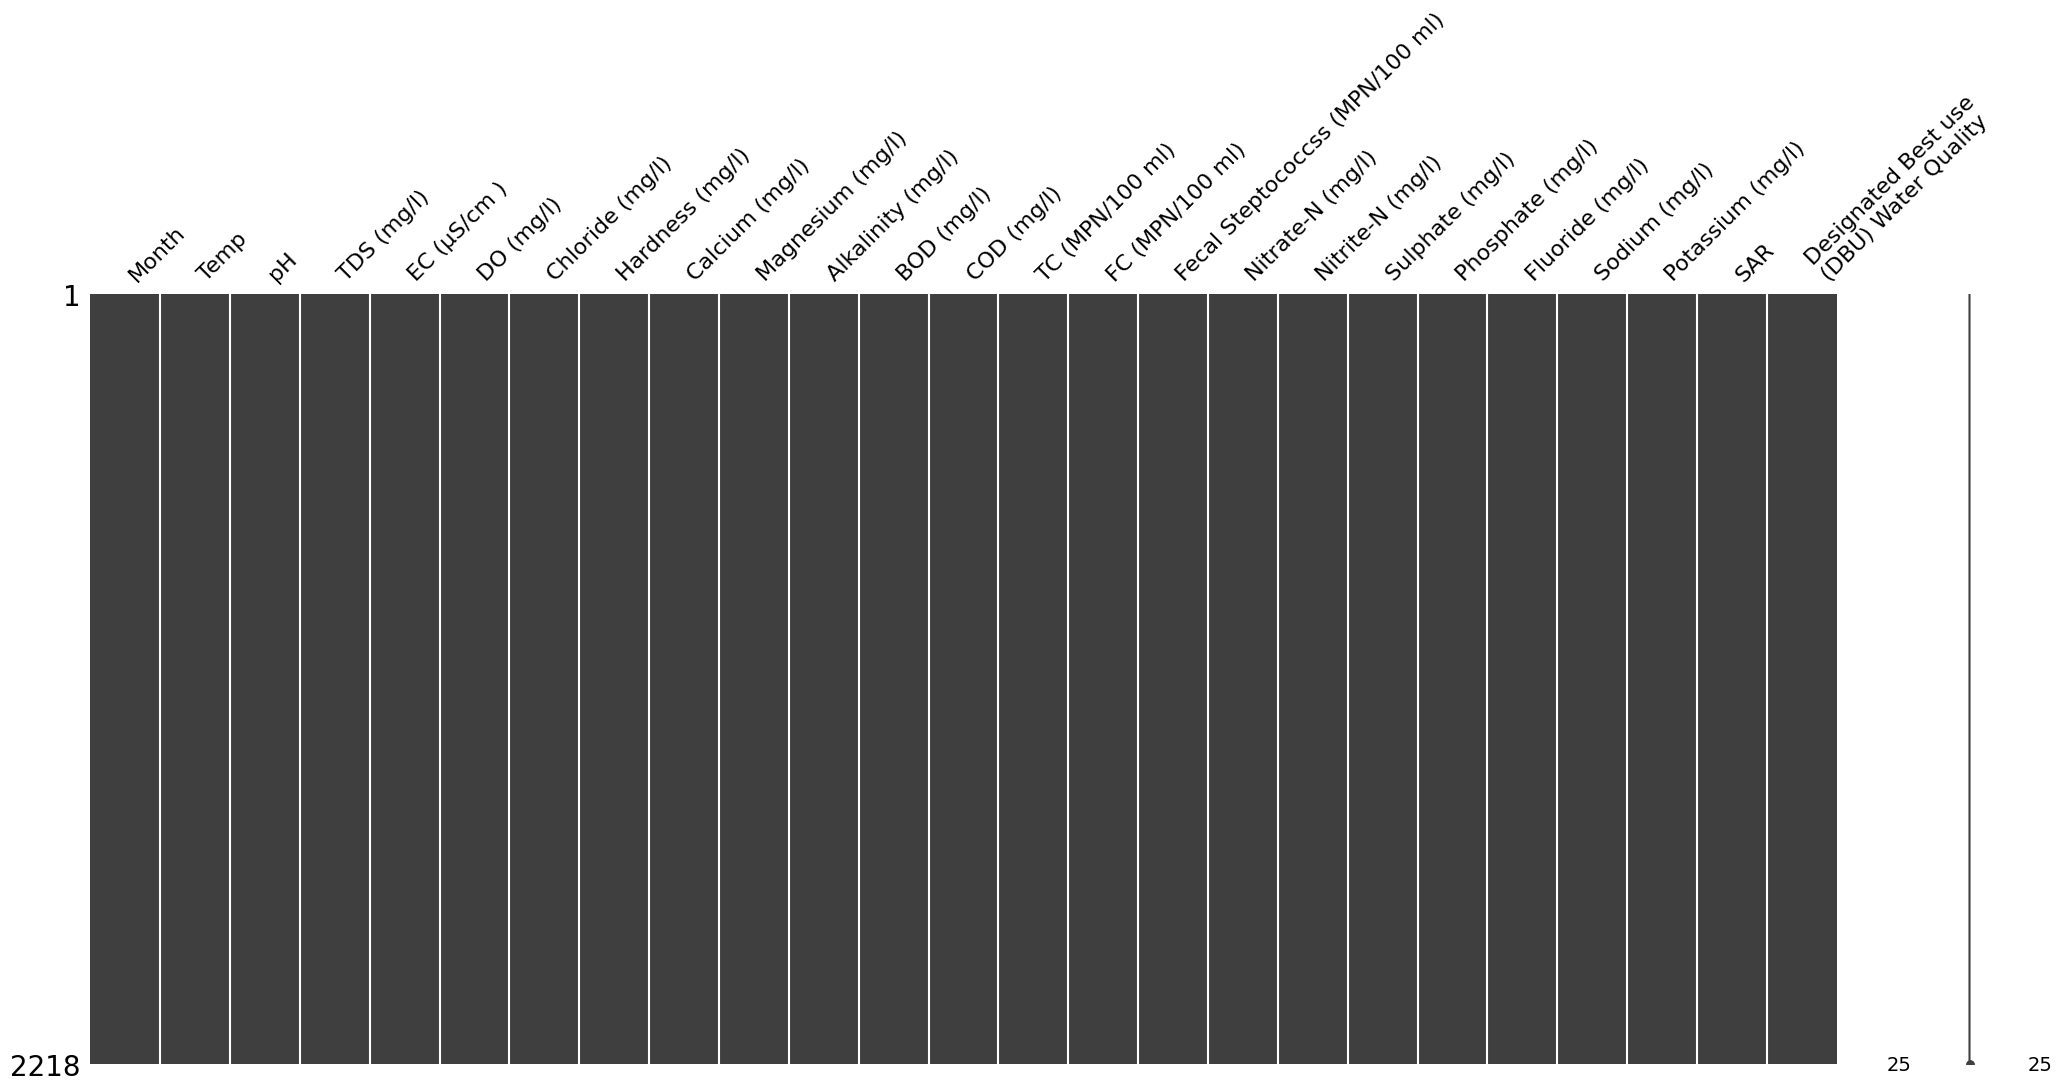

In [151]:
import missingno as msno
msno.matrix(df)
plt.show()

<Axes: >

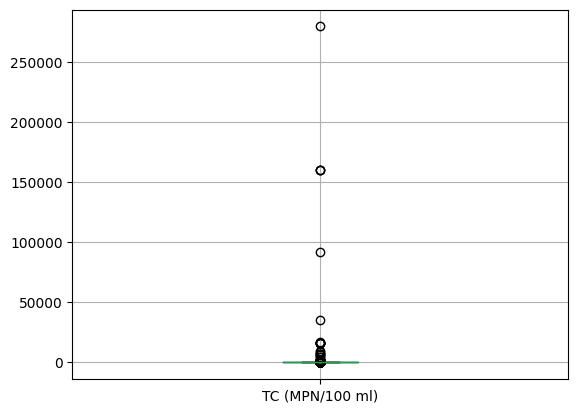

In [152]:
df[['TC (MPN/100 ml)']].dropna().boxplot()


In [153]:
df["Designated Best use\n(DBU) Water Quality"].value_counts()

Designated Best use\n(DBU) Water Quality
B                                           933
A                                           873
E                                           221
D                                           124
C                                            66
Designated Best use\n(DBU) Water Quality      1
Name: count, dtype: int64

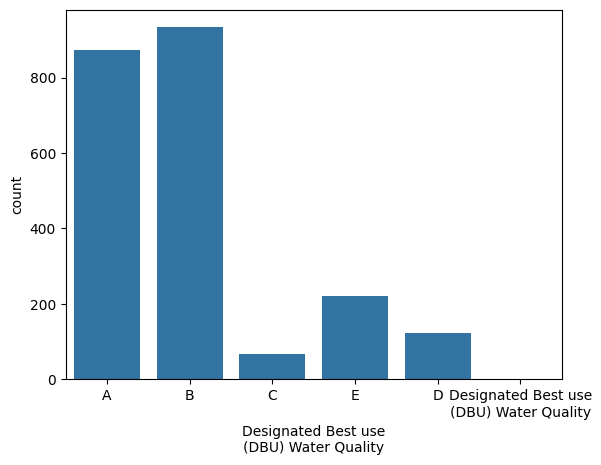

In [154]:
sns.countplot(x="Designated Best use\n(DBU) Water Quality", data=df)
plt.show()

In [155]:
dbu_mapping = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4
}

df['Designated Best use\n(DBU) Water Quality'] = df['Designated Best use\n(DBU) Water Quality'].map(dbu_mapping)

print(df["Designated Best use\n(DBU) Water Quality"].value_counts())

Designated Best use\n(DBU) Water Quality
1.0    933
0.0    873
4.0    221
3.0    124
2.0     66
Name: count, dtype: int64


<ipython-input-155-79b98d7a9899>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Designated Best use\n(DBU) Water Quality'] = df['Designated Best use\n(DBU) Water Quality'].map(dbu_mapping)


In [156]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd
import numpy as np
columns_to_impute = df.select_dtypes(include=[np.number]).columns
imputer = IterativeImputer(random_state=42)
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])
dbu_column = 'Designated Best use\n(DBU) Water Quality'
df[dbu_column] = df[dbu_column].round()
print("NaN values in DBU column after imputation:", df[dbu_column].isnull().sum())
print("Unique values in DBU column after rounding:", df[dbu_column].unique())



NaN values in DBU column after imputation: 0
Unique values in DBU column after rounding: [0. 1. 2. 4. 3.]


<ipython-input-156-12e494b463af>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])
<ipython-input-156-12e494b463af>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[dbu_column] = df[dbu_column].round()


In [157]:
df.describe().T

count        mean          std  \
Temp                                      2218.0   18.259928     5.762801   
pH                                        2218.0    7.644398     0.367129   
TDS (mg/l)                                2218.0  160.903891   111.364232   
EC (µS/cm )                               2218.0  244.059490   167.837228   
DO (mg/l)                                 2218.0    8.297114     2.536595   
Chloride (mg/l)                           2218.0   13.253521    14.518897   
Hardness (mg/l)                           2218.0  144.695036    93.796108   
Calcium (mg/l)                            2218.0  102.302976    72.221576   
Magnesium (mg/l)                          2218.0   42.388638    34.589851   
Alkalinity (mg/l)                         2218.0  130.964339    79.990748   
BOD (mg/l)                                2218.0    4.673825     9.509593   
COD (mg/l)                                2218.0   20.837047    41.111237   
TC (MPN/100 ml)                           2218.0  633.871367  8671.047937   
FC (MPN/100 ml)                           2218.0  319.478968  4623.160874   
Fecal Steptococcss (MPN/100 ml)           2218.0  319.478968  4623.160874   
Nitrate-N (mg/l)                          2218.0    0.174389     0.192878   
Nitrite-N (mg/l)                          2218.0    0.633383    11.568727   
Sulphate (mg/l)                           2218.0   46.390157    38.677172   
Phosphate (mg/l)                          2218.0    0.231625     0.189958   
Fluoride (mg/l)                           2218.0    0.322457     0.549746   
Sodium (mg/l)                             2218.0   11.775315    14.833997   
Potassium (mg/l)                          2218.0    4.303513     4.017272   
SAR                                       2218.0    0.392287     0.394822   
Designated Best use\n(DBU) Water Quality  2218.0    1.046889     1.241865   

                                               min     25%      50%      75%  \
Temp                                       2.00000   15.00   18.000   22.000   
pH                                         6.34000    7.40    7.630    7.900   
TDS (mg/l)                                17.00000   77.00  133.000  210.000   
EC (µS/cm )                               28.00000  118.00  198.000  320.000   
DO (mg/l)                                  0.60000    7.40    9.040   10.200   
Chloride (mg/l)                            1.00000    5.00    8.000   17.000   
Hardness (mg/l)                           13.00000   73.00  112.000  206.000   
Calcium (mg/l)                             8.00000   51.00   78.000  128.000   
Magnesium (mg/l)                           3.00000   16.00   28.000   62.000   
Alkalinity (mg/l)                         13.00000   68.00  104.000  178.000   
BOD (mg/l)                                 0.80000    1.00    1.200    2.400   
COD (mg/l)                                 4.00000    4.00    5.000   12.000   
TC (MPN/100 ml)                            0.17386    1.80   70.000  140.000   
FC (MPN/100 ml)                            0.17386    1.80   41.000   94.000   
Fecal Steptococcss (MPN/100 ml)            0.17386    1.80   41.000   94.000   
Nitrate-N (mg/l)                           0.01000    0.07    0.110    0.200   
Nitrite-N (mg/l)                           0.00060    0.02    0.040    0.090   
Sulphate (mg/l)                            4.44000   19.57   32.155   56.295   
Phosphate (mg/l)                           0.01000    0.13    0.180    0.250   
Fluoride (mg/l)                            0.01000    0.20    0.280    0.390   
Sodium (mg/l)                              0.70000    3.30    6.100   13.200   
Potassium (mg/l)                           0.10000    2.10    2.900    4.700   
SAR                                        0.04000    0.16    0.240    0.470   
Designated Best use\n(DBU) Water Quality   0.00000    0.00    1.000    1.000   

                                                    max  
Temp                                          36.000000  


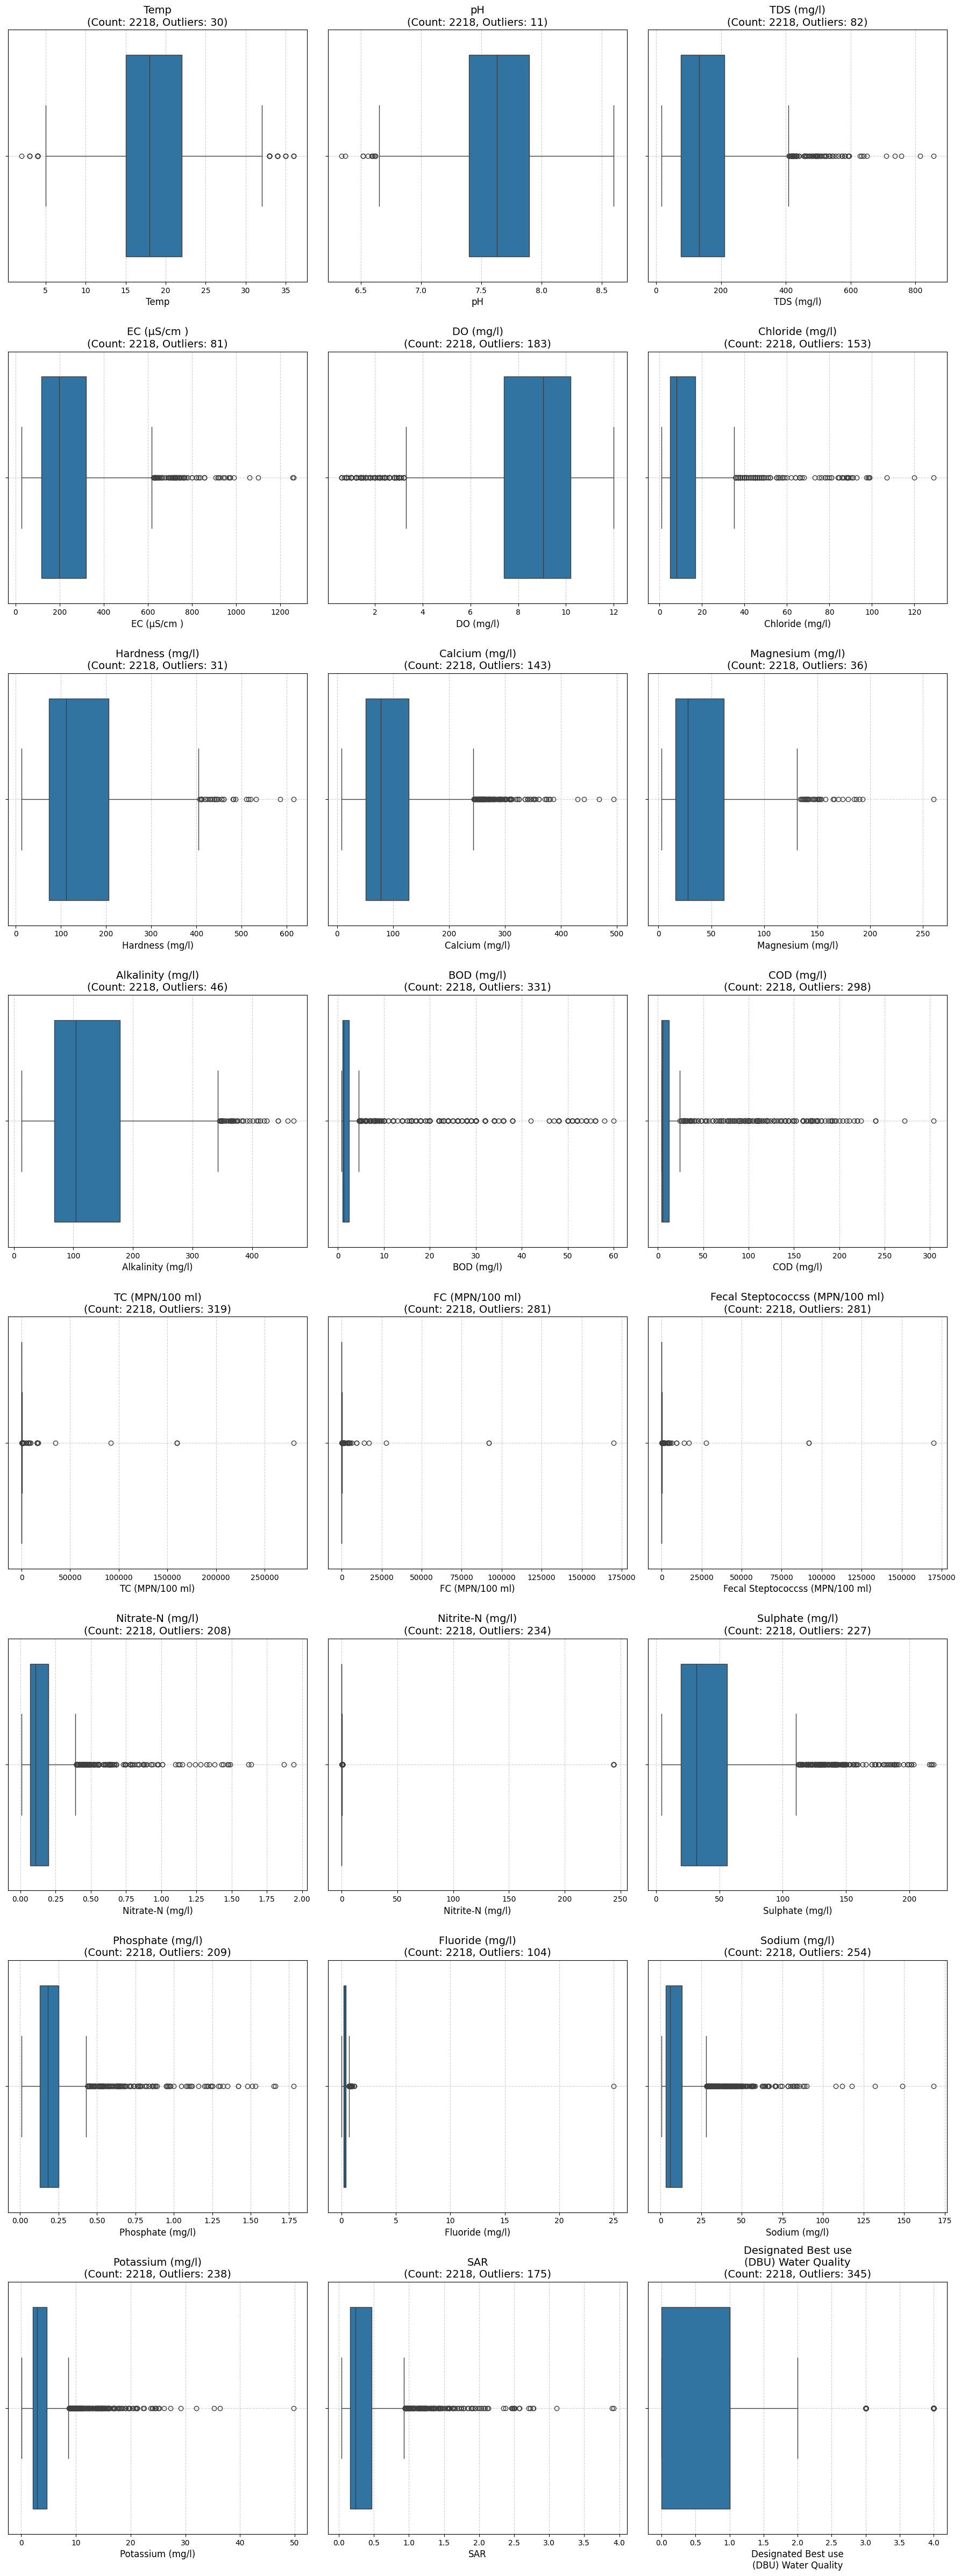

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns and their descriptions
features = [
    'Temp', 'pH', 'TDS (mg/l)', 'EC (µS/cm )', 'DO (mg/l)', 'Chloride (mg/l)',
    'Hardness (mg/l)', 'Calcium (mg/l)', 'Magnesium (mg/l)', 'Alkalinity (mg/l)',
    'BOD (mg/l)', 'COD (mg/l)', 'TC (MPN/100 ml)', 'FC (MPN/100 ml)',
    'Fecal Steptococcss (MPN/100 ml)', 'Nitrate-N (mg/l)', 'Nitrite-N (mg/l)',
    'Sulphate (mg/l)', 'Phosphate (mg/l)', 'Fluoride (mg/l)', 'Sodium (mg/l)',
    'Potassium (mg/l)', 'SAR', 'Designated Best use\n(DBU) Water Quality'
]

# Create a dictionary to store count and feature for sorting
feature_counts = {feature: df[feature].count() for feature in features}

# Sort features by the count in descending order
sorted_features = sorted(feature_counts.keys(), key=lambda x: feature_counts[x], reverse=True)

# Number of rows and columns for the grid
num_cols = 3
num_rows = -(-len(sorted_features) // num_cols)  # Ceiling division

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 6 * num_rows))
axes = axes.flatten()

# Plot each feature in the sorted order
for idx, feature in enumerate(sorted_features):
    ax = axes[idx]

    # Calculate the IQR for detecting outliers
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count the number of outliers
    outliers_count = ((df[feature] < lower_bound) | (df[feature] > upper_bound)).sum()
    count = df[feature].count()  # Total non-NaN count

    # Create the box plot
    sns.boxplot(x=df[feature], ax=ax)
    ax.set_title(f'{feature}\n(Count: {count}, Outliers: {outliers_count})', fontsize=14)
    ax.set_xlabel(feature, fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.6)

# Hide unused axes
for idx in range(len(sorted_features), len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout
plt.tight_layout()
plt.show()


Processing Temp...


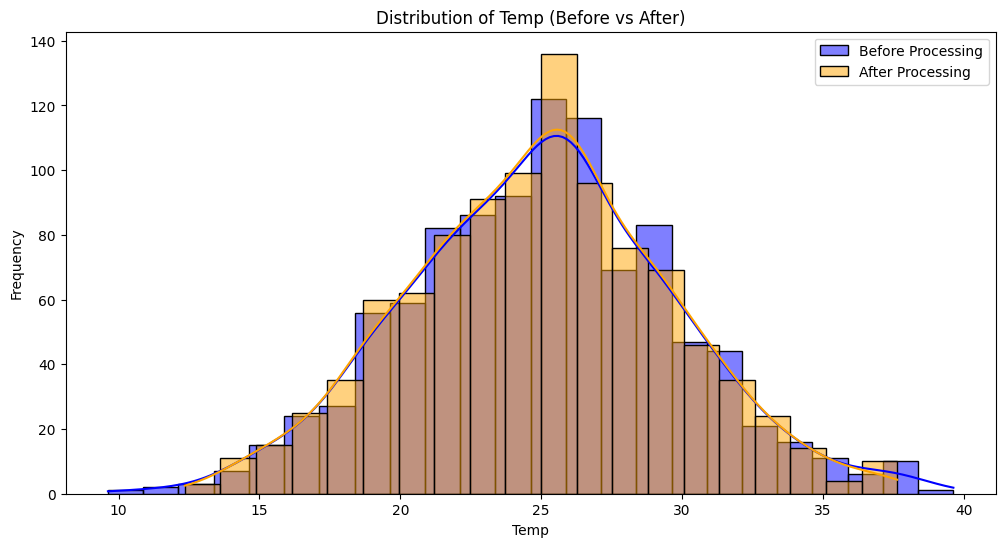

After processing Temp, shape: (991, 4)
Processing pH...


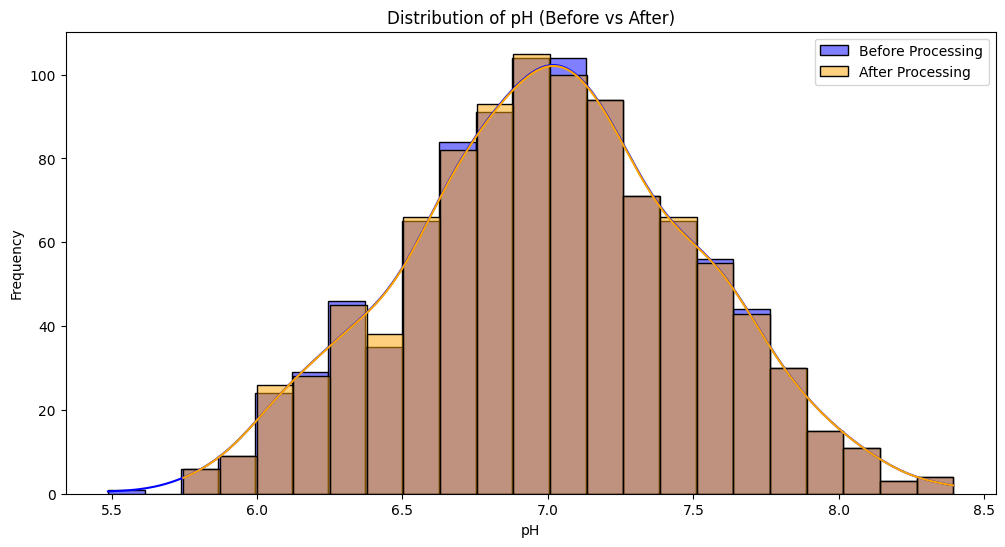

After processing pH, shape: (990, 4)
Processing Hardness (mg/l)...


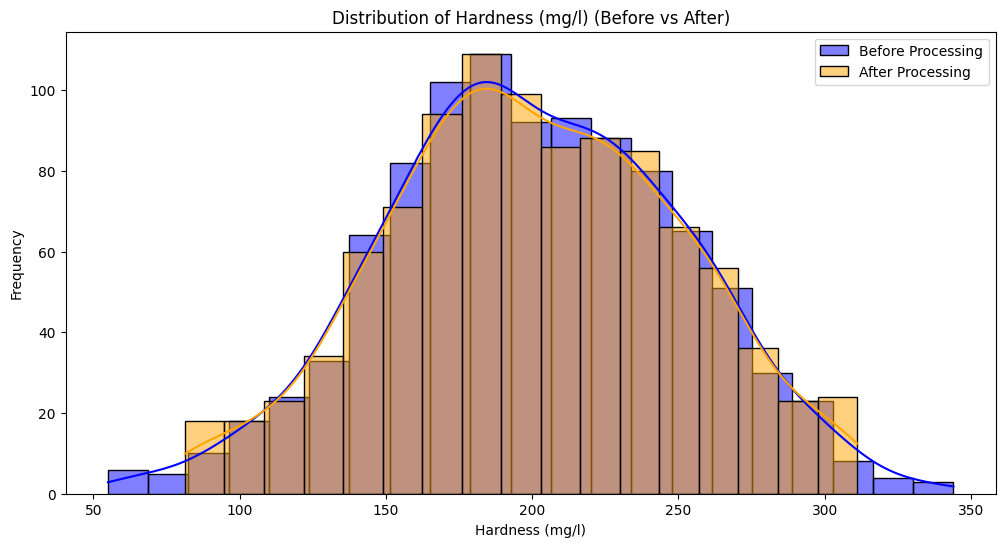

After processing Hardness (mg/l), shape: (990, 4)
Processing Alkalinity (mg/l)...


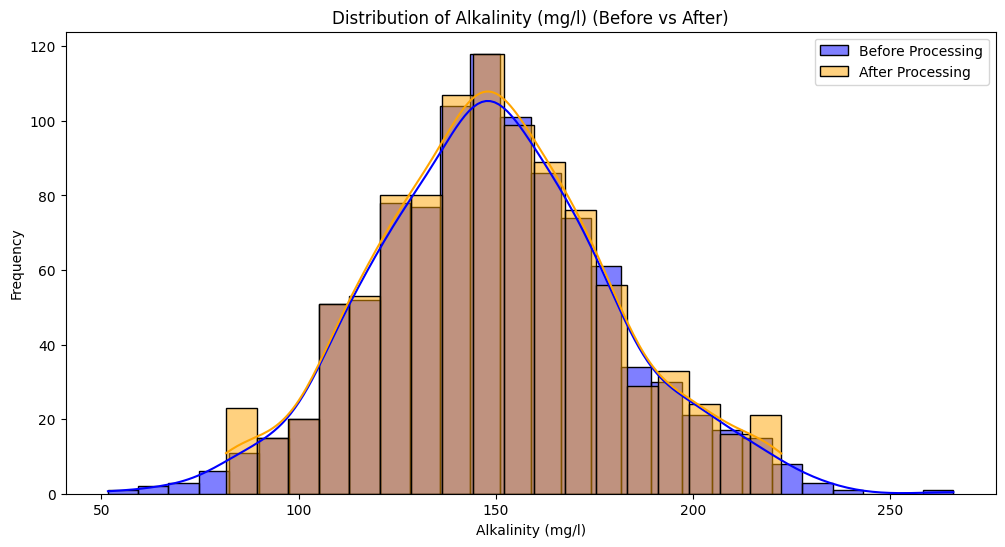

After processing Alkalinity (mg/l), shape: (990, 4)
Original shape: (1000, 4), Cleaned shape: (990, 4)


In [159]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
import seaborn as sns


# List of features to process
selected_features = ['Temp', 'pH', 'Hardness (mg/l)', 'Alkalinity (mg/l)']
df_cleaned = df_scaled.copy()

# Functions for outlier handling
def remove_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

def remove_outliers_zscore(df, feature, threshold=3):
    z_scores = zscore(df[feature].dropna())
    return df[np.abs(z_scores) <= threshold]

def cap_outliers_percentile(df, feature, lower_percentile=0.01, upper_percentile=0.99):
    lower_bound = df[feature].quantile(lower_percentile)
    upper_bound = df[feature].quantile(upper_percentile)
    df[feature] = np.clip(df[feature], lower_bound, upper_bound)
    return df

def apply_winsorization(df, feature, limits=(0.01, 0.01)):
    df[feature] = winsorize(df[feature], limits=limits)
    return df

# Processing loop
for feature in selected_features:
    print(f"Processing {feature}...")

    # Plot before processing
    plt.figure(figsize=(12, 6))
    sns.histplot(df_cleaned[feature], kde=True, label="Before Processing", color='blue')

    # Apply different outlier-handling methods based on feature
    if feature == 'Temp':
        df_cleaned = remove_outliers_iqr(df_cleaned, feature)
    elif feature == 'pH':
        df_cleaned = remove_outliers_zscore(df_cleaned, feature)
    elif feature == 'Hardness (mg/l)':
        df_cleaned = cap_outliers_percentile(df_cleaned, feature)
    elif feature == 'Alkalinity (mg/l)':
        df_cleaned = apply_winsorization(df_cleaned, feature)

    # Plot after processing
    sns.histplot(df_cleaned[feature], kde=True, label="After Processing", color='orange')
    plt.title(f"Distribution of {feature} (Before vs After)")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

    print(f"After processing {feature}, shape: {df_cleaned.shape}")

# Final dataset shapes
print(f"Original shape: {df_scaled.shape}, Cleaned shape: {df_cleaned.shape}")


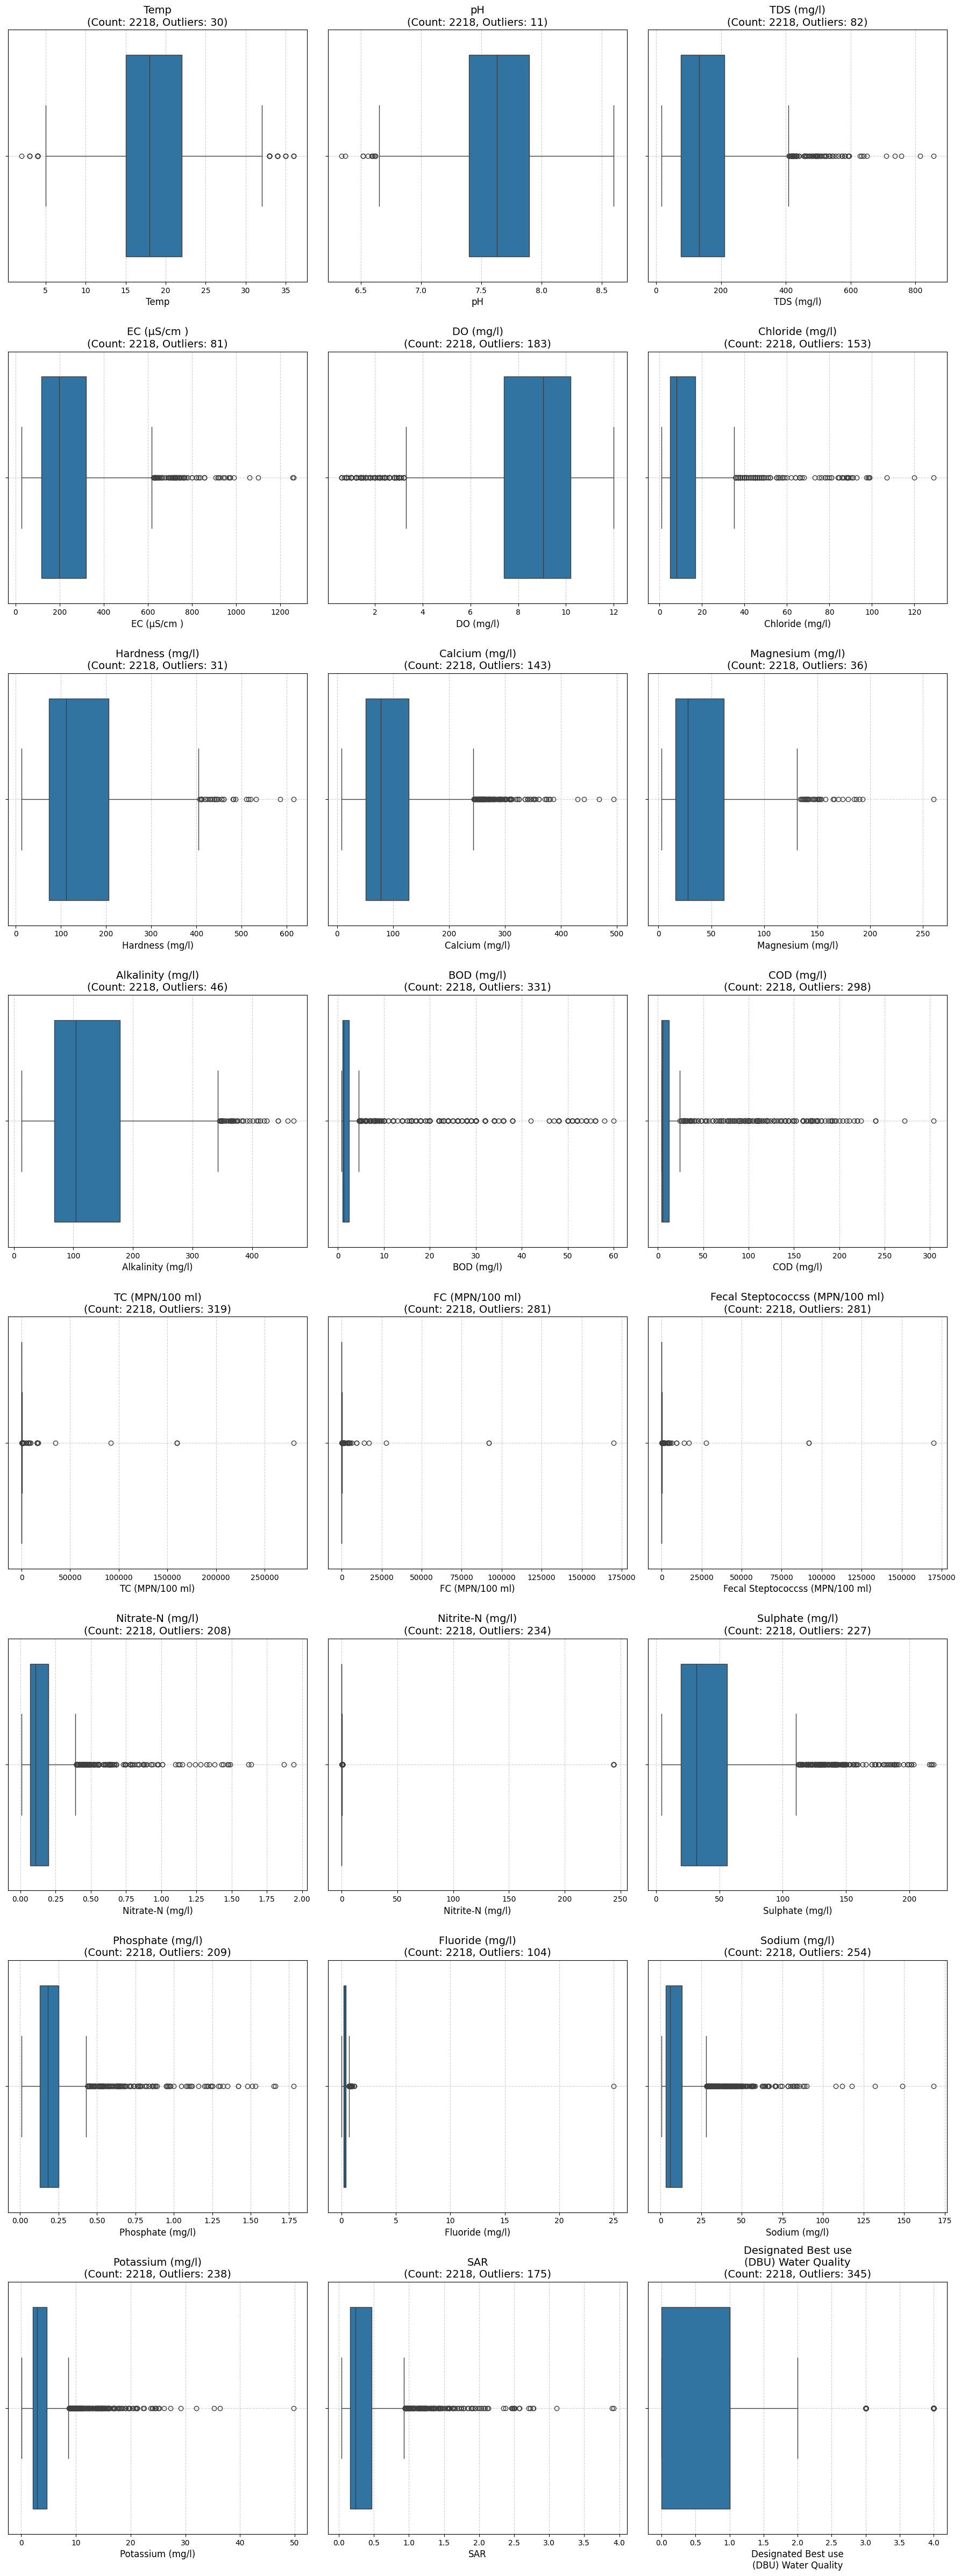

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame (replace with your actual DataFrame)


# List of columns to plot
features = [
    'Temp', 'pH', 'TDS (mg/l)', 'EC (µS/cm )', 'DO (mg/l)', 'Chloride (mg/l)',
    'Hardness (mg/l)', 'Calcium (mg/l)', 'Magnesium (mg/l)', 'Alkalinity (mg/l)',
    'BOD (mg/l)', 'COD (mg/l)', 'TC (MPN/100 ml)', 'FC (MPN/100 ml)',
    'Fecal Steptococcss (MPN/100 ml)', 'Nitrate-N (mg/l)', 'Nitrite-N (mg/l)',
    'Sulphate (mg/l)', 'Phosphate (mg/l)', 'Fluoride (mg/l)', 'Sodium (mg/l)',
    'Potassium (mg/l)', 'SAR', 'Designated Best use\n(DBU) Water Quality'
]

# Create a dictionary to store counts, ignoring missing features
feature_counts = {feature: df[feature].count() for feature in features if feature in df.columns}

# Sort features by the count in descending order
sorted_features = sorted(feature_counts.keys(), key=lambda x: feature_counts[x], reverse=True)

# Number of rows and columns for the grid
num_cols = 3
num_rows = -(-len(sorted_features) // num_cols)  # Ceiling division

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 6 * num_rows))
axes = axes.flatten()

# Plot each feature in the sorted order
for idx, feature in enumerate(sorted_features):
    ax = axes[idx]

    # Calculate the IQR for detecting outliers
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count the number of outliers
    outliers_count = ((df[feature] < lower_bound) | (df[feature] > upper_bound)).sum()
    count = df[feature].count()  # Total non-NaN count

    # Create the box plot
    sns.boxplot(x=df[feature], ax=ax)
    ax.set_title(f'{feature}\n(Count: {count}, Outliers: {outliers_count})', fontsize=14)
    ax.set_xlabel(feature, fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.6)

# Hide unused axes
for idx in range(len(sorted_features), len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout
plt.tight_layout()
plt.show()


In [161]:
from sklearn.preprocessing import StandardScaler
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_columns.remove('Designated Best use\n(DBU) Water Quality')
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df_scaled.head()


Month      Temp        pH  TDS (mg/l)  EC (µS/cm )  DO (mg/l)  \
0  Jan-22 -2.127905 -0.584117   -1.121833    -1.108821   0.750343   
1  Feb-22 -2.127905 -0.366161   -1.032017    -1.025388   0.750343   
2  Mar-22 -1.260076 -0.938296   -1.076925    -1.073064   0.908070   
3  Apr-22 -1.780773 -1.129008   -1.202667    -1.210132   1.065797   
4  May-22 -1.954339 -1.619410   -1.220630    -1.198213   0.908070   

   Chloride (mg/l)  Hardness (mg/l)  Calcium (mg/l)  Magnesium (mg/l)  ...  \
0        -0.430813        -0.604586       -0.585871         -0.416072  ...   
1        -0.293031        -0.967156       -1.001353         -0.531739  ...   
2        -0.499704        -1.063131       -1.029052         -0.734156  ...   
3        -0.499704        -1.159105       -1.112148         -0.820907  ...   
4        -0.568596        -1.201760       -1.167546         -0.820907  ...   

   Fecal Steptococcss (MPN/100 ml)  Nitrate-N (mg/l)  Nitrite-N (mg/l)  \
0                        -0.069082         -0.645059         -0.053033   
1                        -0.069082         -0.800633         -0.052168   
2                        -0.069082         -0.541343         -0.054157   
3                        -0.069082         -0.696917         -0.054243   
4                        -0.069082         -0.593201         -0.052168   

   Sulphate (mg/l)  Phosphate (mg/l)  Fluoride (mg/l)  Sodium (mg/l)  \
0        -0.236631         -0.693073        -0.077248      -0.106220   
1        -0.743763         -0.798383        -0.077248      -0.133191   
2        -0.738591         -0.482452        -0.222802      -0.085992   
3        -0.783071         -0.324487        -0.186414       0.028636   
4        -0.339557         -0.324487        -0.313774      -0.665872   

   Potassium (mg/l)       SAR  Designated Best use\n(DBU) Water Quality  
0         -0.797615  0.196876                                       0.0  
1         -0.822513  0.450212                                       0.0  
2         -0.822513  0.703548                                       0.0  
3         -0.847411  1.235554                                       0.0  
4         -0.648226 -0.639133                                       0.0  

[5 rows x 25 columns]

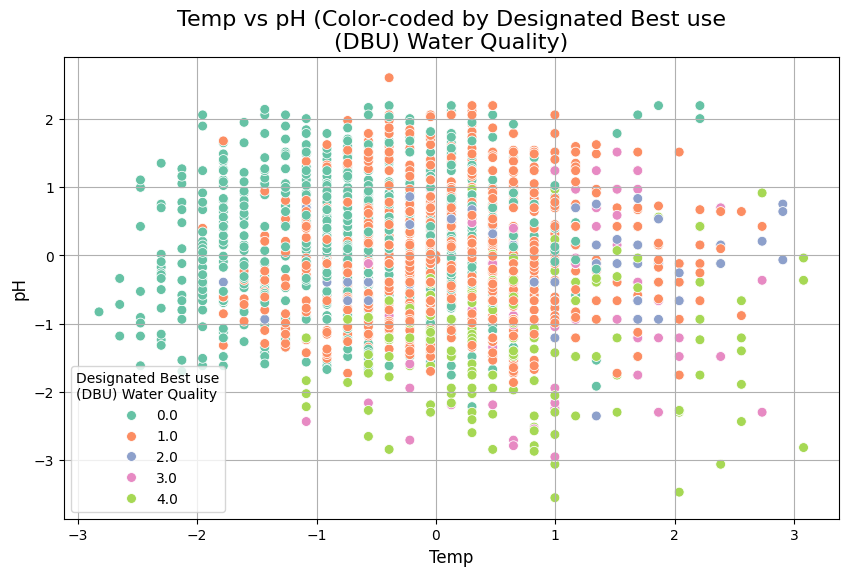

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
feature_x = 'Temp'
feature_y = 'pH'
target = 'Designated Best use\n(DBU) Water Quality'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_scaled, x=feature_x, y=feature_y, hue=target, palette='Set2', s=50)
plt.title(f'{feature_x} vs {feature_y} (Color-coded by {target})', fontsize=16)
plt.xlabel(feature_x, fontsize=12)
plt.ylabel(feature_y, fontsize=12)
plt.legend(title=target, fontsize=10)
plt.grid(True)
plt.show()


<ipython-input-163-6e783648fd43>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Binary_Class'] = (df_scaled['Designated Best use\n(DBU) Water Quality'] == dbu).astype(int)


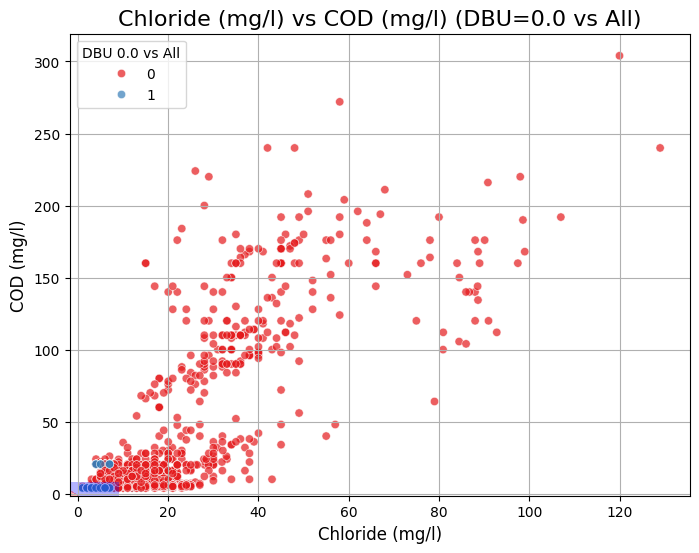

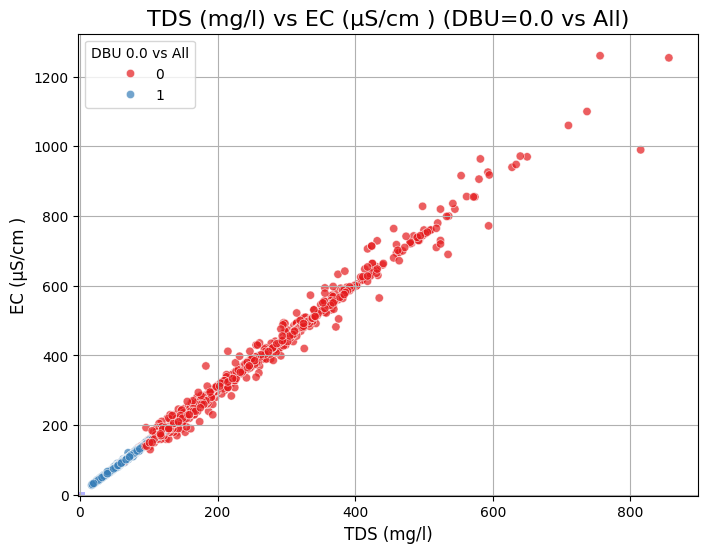

<ipython-input-163-6e783648fd43>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Binary_Class'] = (df_scaled['Designated Best use\n(DBU) Water Quality'] == dbu).astype(int)


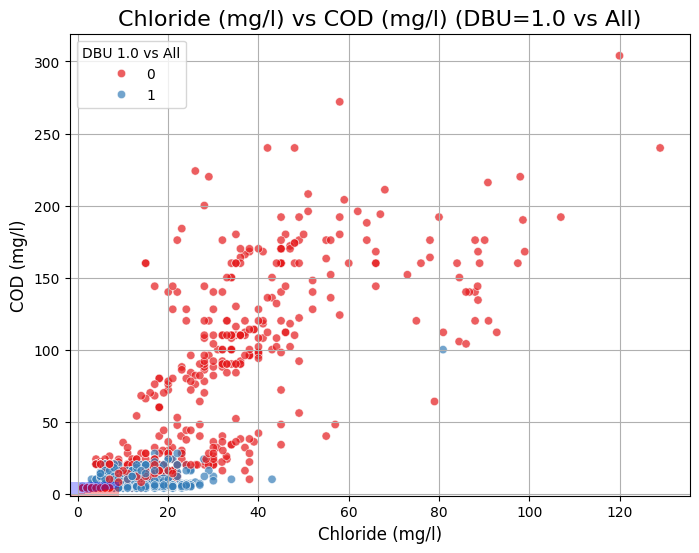

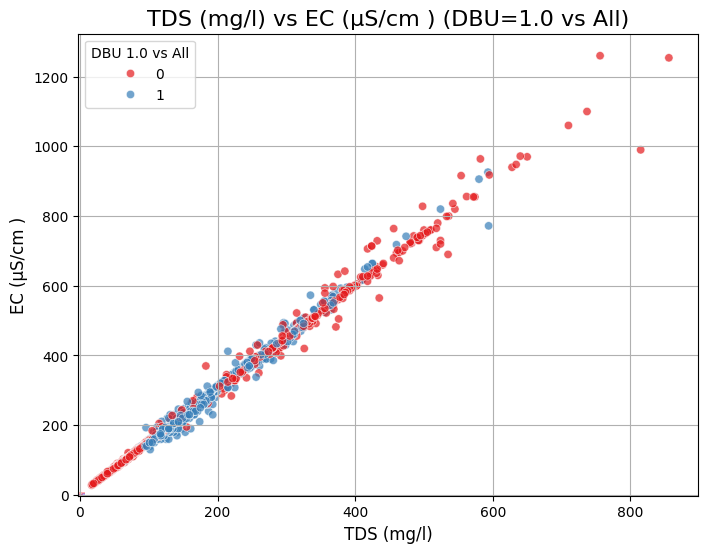

<ipython-input-163-6e783648fd43>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Binary_Class'] = (df_scaled['Designated Best use\n(DBU) Water Quality'] == dbu).astype(int)


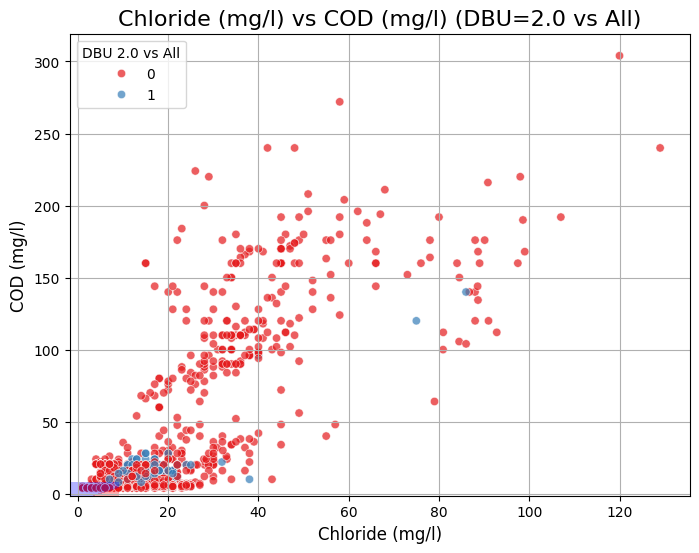

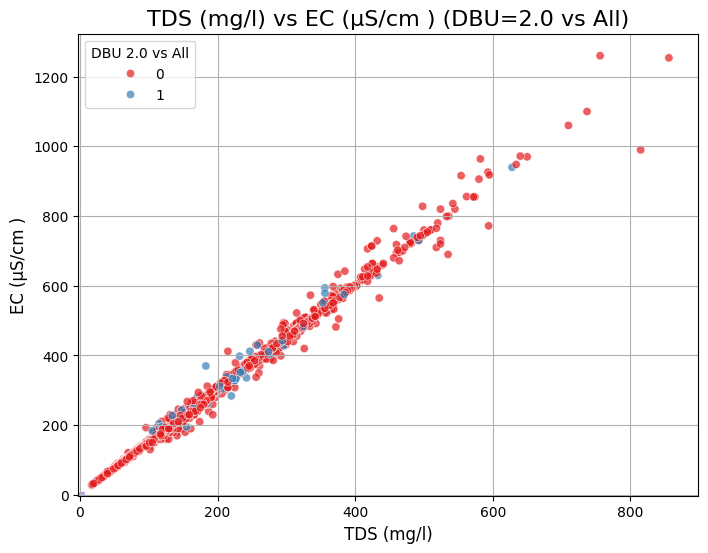

<ipython-input-163-6e783648fd43>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Binary_Class'] = (df_scaled['Designated Best use\n(DBU) Water Quality'] == dbu).astype(int)


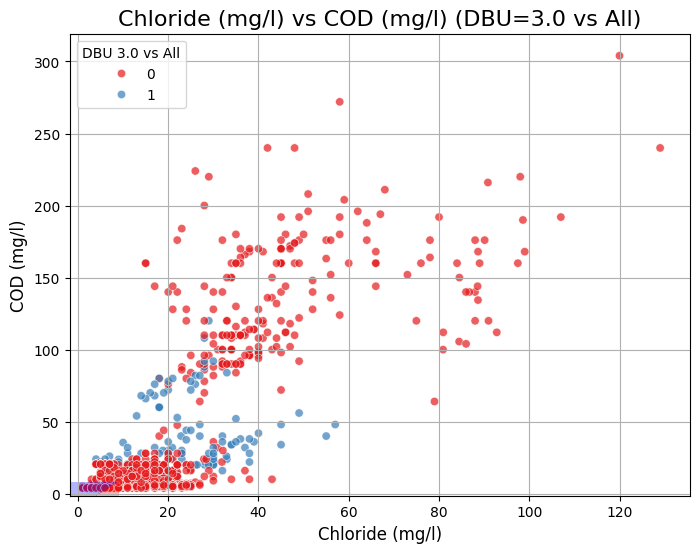

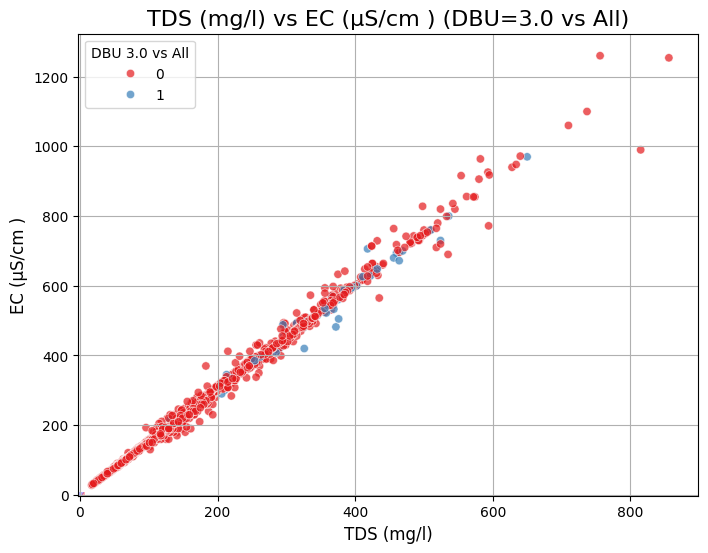

<ipython-input-163-6e783648fd43>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Binary_Class'] = (df_scaled['Designated Best use\n(DBU) Water Quality'] == dbu).astype(int)


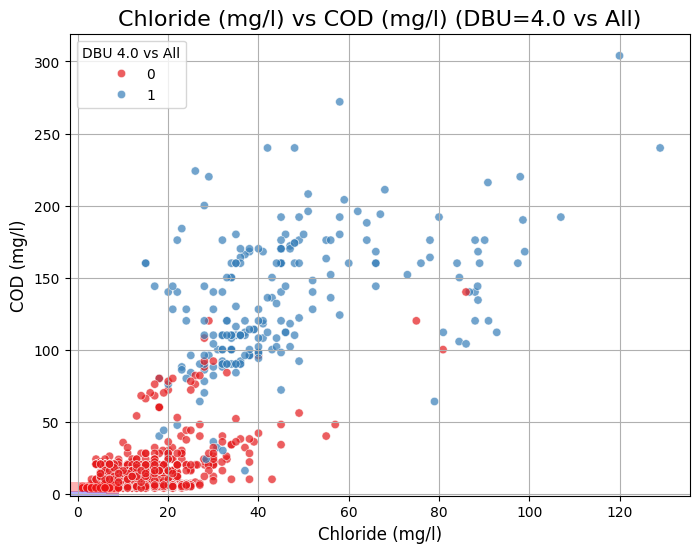

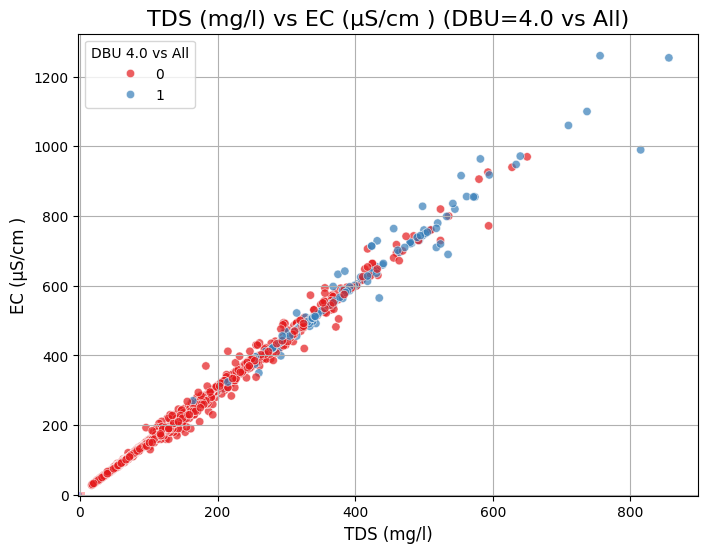

<ipython-input-163-6e783648fd43>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Binary_Class'], inplace=True)


In [163]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Assuming df_scaled contains your scaled features
dbu_categories = sorted(df_scaled['Designated Best use\n(DBU) Water Quality'].unique())
feature_pairs = [
    ('Chloride (mg/l)', 'COD (mg/l)'),
    ('TDS (mg/l)', 'EC (µS/cm )')
]

# Loop through DBU categories
for dbu in dbu_categories:
    # Create a binary classification target
    df['Binary_Class'] = (df_scaled['Designated Best use\n(DBU) Water Quality'] == dbu).astype(int)

    for x, y in feature_pairs:
        # Select the features and target
        X = df_scaled[[x, y]].values
        y_binary = df['Binary_Class'].values

        # Scale the features (optional if already scaled)
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Train a Logistic Regression model
        model = LogisticRegression()
        model.fit(X_scaled, y_binary)

        # Generate a grid of points to evaluate the decision boundary
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                             np.linspace(y_min, y_max, 500))
        grid_points = np.c_[xx.ravel(), yy.ravel()]
        grid_points_scaled = scaler.transform(grid_points)  # Scale the grid points
        Z = model.predict(grid_points_scaled)
        Z = Z.reshape(xx.shape)

        # Plot the scatterplot with decision boundary
        plt.figure(figsize=(8, 6))
        sns.scatterplot(
            data=df, x=x, y=y, hue='Binary_Class', palette='Set1', alpha=0.7
        )
        plt.contourf(xx, yy, Z, levels=1, alpha=0.3, colors=['blue', 'red'])
        plt.title(f'{x} vs {y} (DBU={dbu} vs All)', fontsize=16)
        plt.xlabel(x, fontsize=12)
        plt.ylabel(y, fontsize=12)
        plt.legend(title=f'DBU {dbu} vs All', fontsize=10)
        plt.grid(True)
        plt.show()

# Cleanup the added Binary_Class column
df.drop(columns=['Binary_Class'], inplace=True)


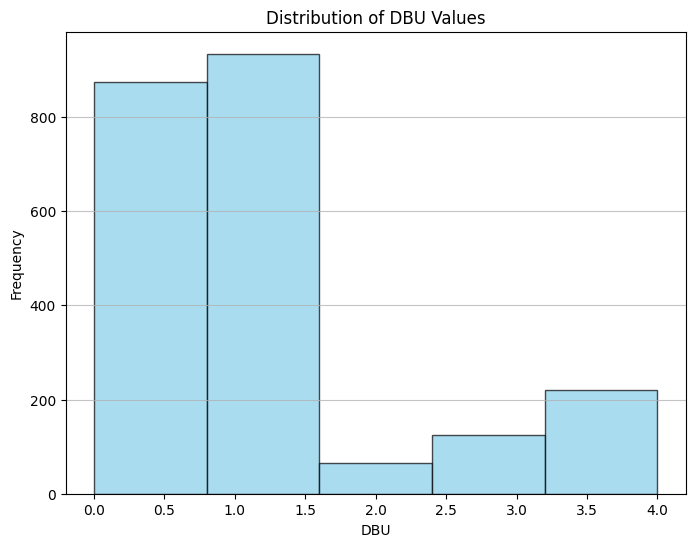

In [164]:
plt.figure(figsize=(8, 6))
plt.hist(df['Designated Best use\n(DBU) Water Quality'], bins=5, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribution of DBU Values")
plt.xlabel("DBU")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()

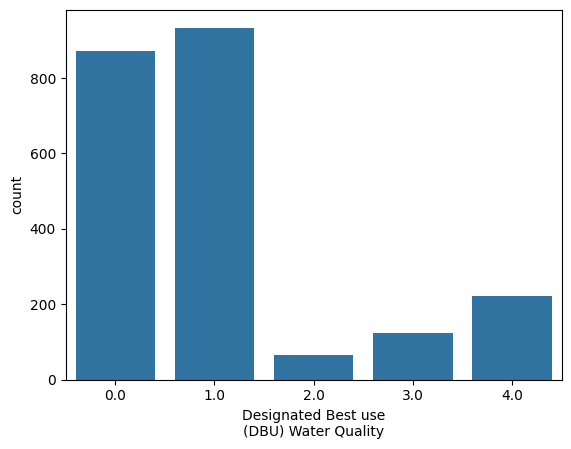

In [165]:
sns.countplot(x="Designated Best use\n(DBU) Water Quality", data=df)
plt.show()

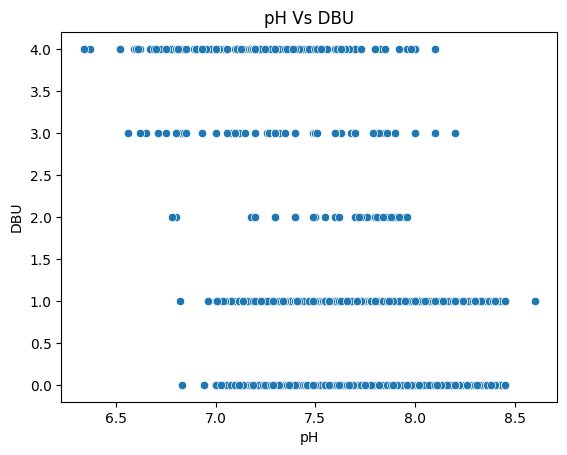

In [166]:
sns.scatterplot(data = df,x = 'pH',y = 'Designated Best use\n(DBU) Water Quality')
plt.title('pH Vs DBU')
plt.xlabel('pH')
plt.ylabel('DBU')
plt.show()

In [167]:
print(df["Designated Best use\n(DBU) Water Quality"].value_counts())

Designated Best use\n(DBU) Water Quality
1.0    934
0.0    873
4.0    221
3.0    124
2.0     66
Name: count, dtype: int64


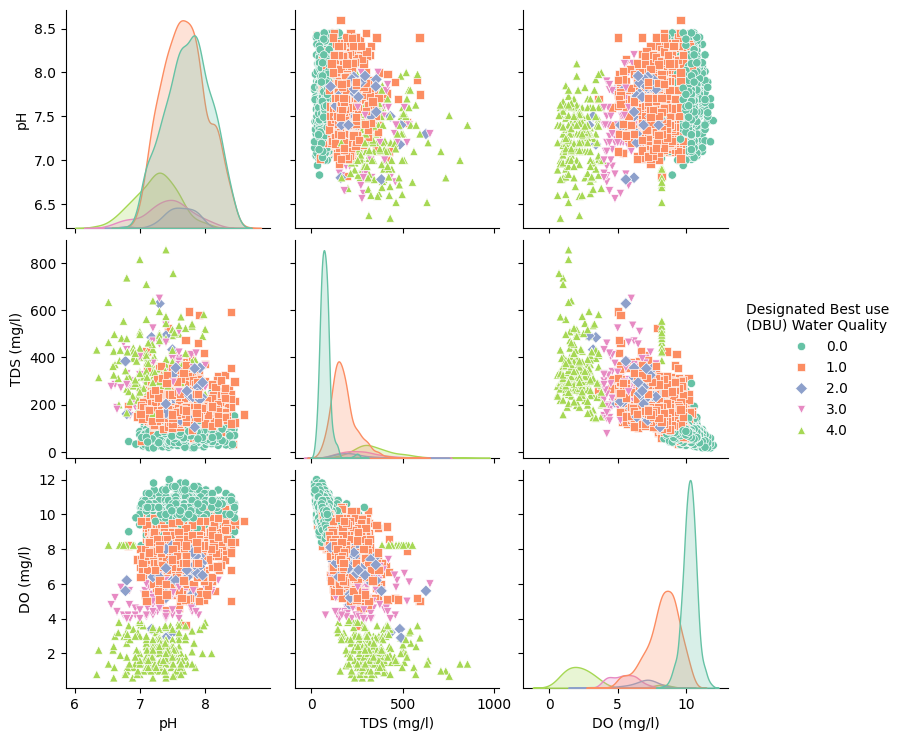

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt
markers = ['o', 's', 'D', 'v', '^']
sns.pairplot(df,
             hue='Designated Best use\n(DBU) Water Quality',
             diag_kind='kde',
             vars=['pH', 'TDS (mg/l)', 'DO (mg/l)'],
             markers=markers,
             palette='Set2')

plt.show()



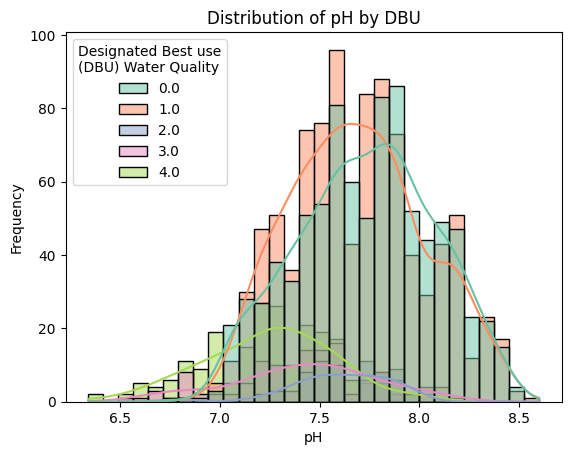

In [169]:
custom_palette = sns.color_palette("Set2", 5)
sns.histplot(data=df, x='pH', hue='Designated Best use\n(DBU) Water Quality', kde=True, bins=30, palette=custom_palette)
plt.title("Distribution of pH by DBU")
plt.xlabel("pH")
plt.ylabel("Frequency")
plt.show()


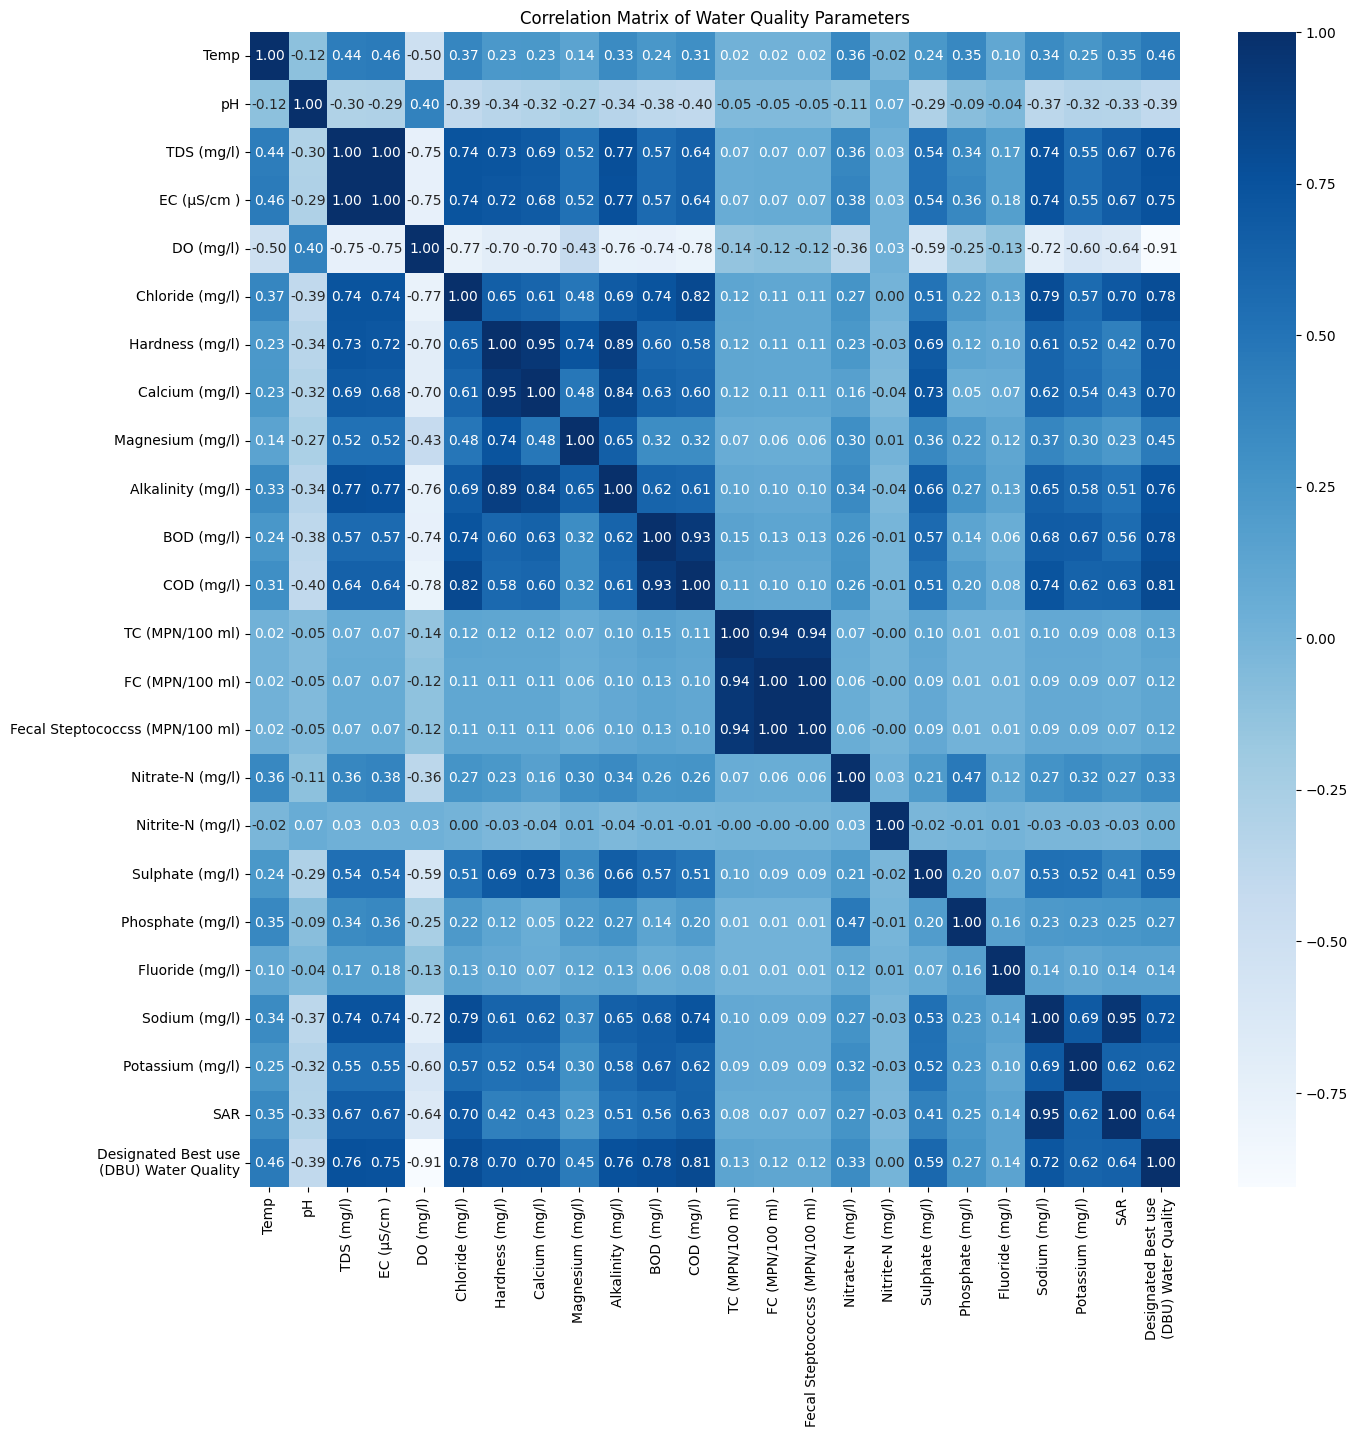

                                               Temp        pH  TDS (mg/l)  \
Designated Best use\n(DBU) Water Quality                                    
0.0                                       14.924399  7.732428   74.103093   
1.0                                       19.302484  7.688142  178.531939   
2.0                                       23.227273  7.603030  227.484848   
3.0                                       24.258065  7.421210  265.475806   
4.0                                       22.180995  7.249367  350.728507   

                                          EC (µS/cm )  DO (mg/l)  \
Designated Best use\n(DBU) Water Quality                           
0.0                                        113.175258  10.261054   
1.0                                        271.270824   8.301985   
2.0                                        347.772727   6.831818   
3.0                                        397.983871   5.441129   
4.0                                        528.74208

In [170]:

df = df.drop(columns=["Month"], errors='ignore')
numeric_columns = df.select_dtypes(include=["float64", "int64"])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, cmap="Blues", annot=True, fmt=".2f")
plt.title("Correlation Matrix of Water Quality Parameters")
plt.show()
grouped_stats = df.groupby("Designated Best use\n(DBU) Water Quality").mean()
print(grouped_stats)


In [171]:

print(f"Missing values in DO: {df['DO (mg/l)'].isnull().sum()}")
print(f"DO (mg/l) descriptive statistics:\n{df['DO (mg/l)'].describe()}")


Missing values in DO: 0
DO (mg/l) descriptive statistics:
count    2218.000000
mean        8.297114
std         2.536595
min         0.600000
25%         7.400000
50%         9.040000
75%        10.200000
max        12.000000
Name: DO (mg/l), dtype: float64


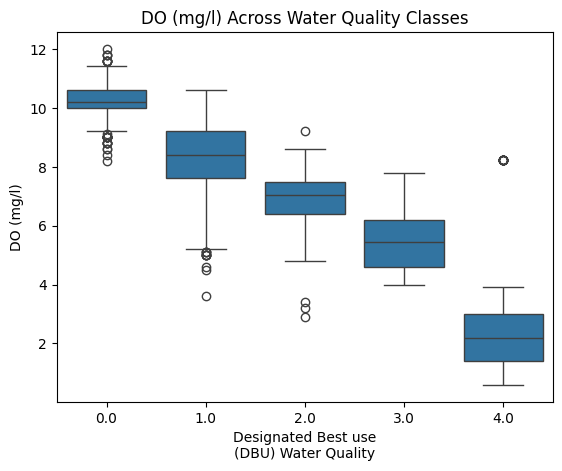

In [172]:
sns.boxplot(data=df, x='Designated Best use\n(DBU) Water Quality', y='DO (mg/l)')
plt.title('DO (mg/l) Across Water Quality Classes')
plt.show()


<ipython-input-173-1aea0372121d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Designated Best use\n(DBU) Water Quality"], palette="coolwarm")


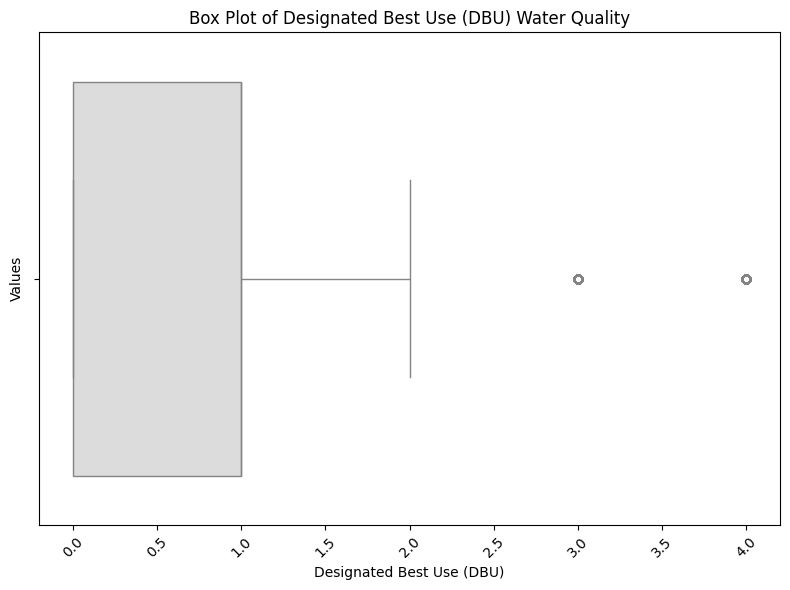

In [173]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["Designated Best use\n(DBU) Water Quality"], palette="coolwarm")
plt.title("Box Plot of Designated Best Use (DBU) Water Quality")
plt.xlabel("Designated Best Use (DBU)")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [174]:
df_scaled.head()

Month      Temp        pH  TDS (mg/l)  EC (µS/cm )  DO (mg/l)  \
0  Jan-22 -2.127905 -0.584117   -1.121833    -1.108821   0.750343   
1  Feb-22 -2.127905 -0.366161   -1.032017    -1.025388   0.750343   
2  Mar-22 -1.260076 -0.938296   -1.076925    -1.073064   0.908070   
3  Apr-22 -1.780773 -1.129008   -1.202667    -1.210132   1.065797   
4  May-22 -1.954339 -1.619410   -1.220630    -1.198213   0.908070   

   Chloride (mg/l)  Hardness (mg/l)  Calcium (mg/l)  Magnesium (mg/l)  ...  \
0        -0.430813        -0.604586       -0.585871         -0.416072  ...   
1        -0.293031        -0.967156       -1.001353         -0.531739  ...   
2        -0.499704        -1.063131       -1.029052         -0.734156  ...   
3        -0.499704        -1.159105       -1.112148         -0.820907  ...   
4        -0.568596        -1.201760       -1.167546         -0.820907  ...   

   Fecal Steptococcss (MPN/100 ml)  Nitrate-N (mg/l)  Nitrite-N (mg/l)  \
0                        -0.069082         -0.645059         -0.053033   
1                        -0.069082         -0.800633         -0.052168   
2                        -0.069082         -0.541343         -0.054157   
3                        -0.069082         -0.696917         -0.054243   
4                        -0.069082         -0.593201         -0.052168   

   Sulphate (mg/l)  Phosphate (mg/l)  Fluoride (mg/l)  Sodium (mg/l)  \
0        -0.236631         -0.693073        -0.077248      -0.106220   
1        -0.743763         -0.798383        -0.077248      -0.133191   
2        -0.738591         -0.482452        -0.222802      -0.085992   
3        -0.783071         -0.324487        -0.186414       0.028636   
4        -0.339557         -0.324487        -0.313774      -0.665872   

   Potassium (mg/l)       SAR  Designated Best use\n(DBU) Water Quality  
0         -0.797615  0.196876                                       0.0  
1         -0.822513  0.450212                                       0.0  
2         -0.822513  0.703548                                       0.0  
3         -0.847411  1.235554                                       0.0  
4         -0.648226 -0.639133                                       0.0  

[5 rows x 25 columns]

In [175]:
duplicated_rows = df_scaled[df_scaled.duplicated()]
print(duplicated_rows)
df_scaled = df_scaled.drop_duplicates()
df_scaled.shape

       Month      Temp        pH  TDS (mg/l)  EC (µS/cm )  DO (mg/l)  \
84    Jan-22 -1.260076 -0.475139   -0.591920    -0.608223   0.671479   
173   Sep-22 -0.045115 -1.564921   -0.942202    -0.935996   0.592615   
193   Jul-22  0.649149 -0.120960   -0.951183    -0.953874   0.513752   
1321  Apr-23  0.128451  2.058604    0.252347     0.255904   0.513752   
1930  May-23  1.690544 -0.665851    0.575684     0.500243  -0.511476   
2674  Jul-24  2.037676 -2.273279    2.363016     2.800609  -2.049317   

      Chloride (mg/l)  Hardness (mg/l)  Calcium (mg/l)  Magnesium (mg/l)  ...  \
84          -0.361922        -0.369982       -0.170389         -0.647406  ...   
173         -0.637487        -0.743216       -0.655118         -0.647406  ...   
193         -0.671933        -0.977820       -0.835160         -0.907657  ...   
1321        -0.155248         0.909677        1.533087         -0.734156  ...   
1930         0.120317         0.003252        0.245093         -0.502823  ...   
2674     

(2212, 25)

In [176]:
df_scaled['Designated Best use\n(DBU) Water Quality'].value_counts()

Designated Best use\n(DBU) Water Quality
1.0    933
0.0    870
4.0    220
3.0    124
2.0     65
Name: count, dtype: int64

In [177]:

df_scaled.to_csv('output.csv', index=False)


In [178]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
df_scaled = df_scaled.drop(columns=["Month"], errors='ignore')
X = df_scaled.drop(columns='Designated Best use\n(DBU) Water Quality')
y = df_scaled['Designated Best use\n(DBU) Water Quality']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Original class distribution:", y_train.value_counts())
print("Resampled class distribution:", y_train_resampled.value_counts())
print(X_train_resampled.shape)
print(y_train_resampled.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

Original class distribution: Designated Best use\n(DBU) Water Quality
1.0    563
0.0    522
4.0    127
3.0     75
2.0     40
Name: count, dtype: int64
Resampled class distribution: Designated Best use\n(DBU) Water Quality
0.0    563
1.0    563
3.0    563
2.0    563
4.0    563
Name: count, dtype: int64
(2815, 23)
(2815,)
(443, 23)
(443,)
(442, 23)
(442,)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.Regresso

Original class distribution:
 Designated Best use\n(DBU) Water Quality
1.0    560
0.0    522
4.0    132
3.0     74
2.0     39
Name: count, dtype: int64
Resampled class distribution:
 Designated Best use\n(DBU) Water Quality
1.0    560
0.0    560
4.0    560
2.0    560
3.0    560
Name: count, dtype: int64

=== XGBoost ===

Confusion Matrix:
 [[174   0   0   0   0]
 [  0 186   0   0   0]
 [  0   2  10   0   1]
 [  0   2   0  23   0]
 [  0   0   0   0  44]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       174
         1.0       0.98      1.00      0.99       186
         2.0       1.00      0.77      0.87        13
         3.0       1.00      0.92      0.96        25
         4.0       0.98      1.00      0.99        44

    accuracy                           0.99       442
   macro avg       0.99      0.94      0.96       442
weighted avg       0.99      0.99      0.99       442

Accuracy: 0.9886877828054299

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


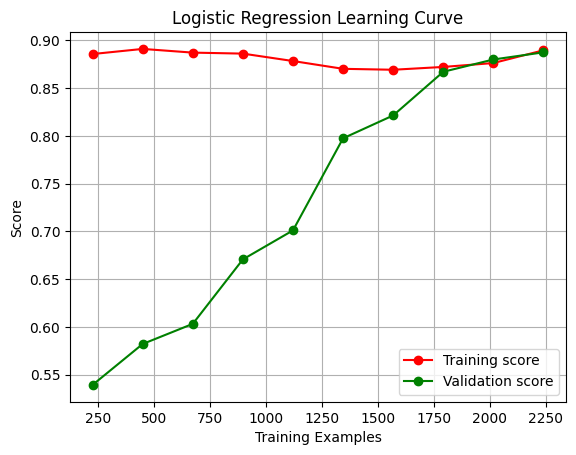


=== Balanced Random Forest ===

Confusion Matrix:
 [[174   0   0   0   0]
 [  0 185   0   1   0]
 [  0   4   8   0   1]
 [  0   0   1  23   1]
 [  0   0   0   0  44]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       174
         1.0       0.98      0.99      0.99       186
         2.0       0.89      0.62      0.73        13
         3.0       0.96      0.92      0.94        25
         4.0       0.96      1.00      0.98        44

    accuracy                           0.98       442
   macro avg       0.96      0.91      0.93       442
weighted avg       0.98      0.98      0.98       442

Accuracy: 0.9819004524886877
Precision: 0.9811410350093214
Recall: 0.9819004524886877
F1-Score: 0.9806926593481216
ROC-AUC: 0.9958088815141561


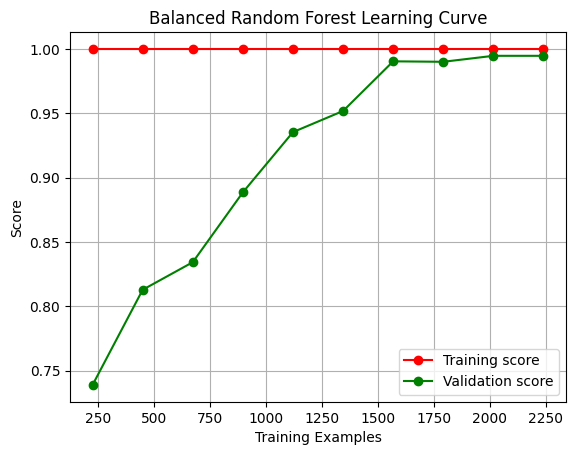


=== LightGBM ===
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000900 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5819
[LightGBM] [Info] Number of data points in the train set: 2800, number of used features: 23
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


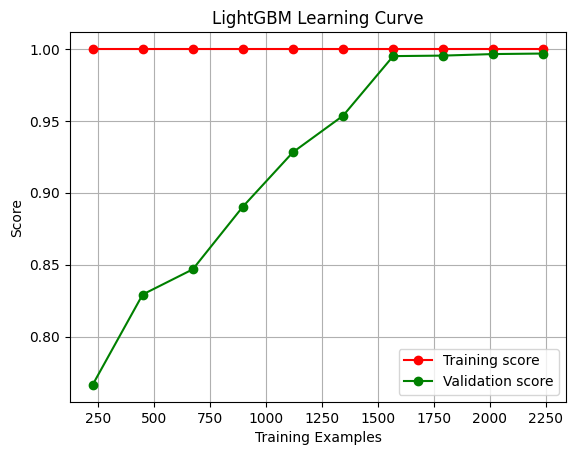

In [179]:
# Required Libraries
from sklearn.model_selection import train_test_split, learning_curve
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import numpy as np

# Models
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

# Data Preparation
df_scaled = df_scaled.drop(columns=["Month"], errors='ignore')
X = df_scaled.drop(columns='Designated Best use\n(DBU) Water Quality')
y = df_scaled['Designated Best use\n(DBU) Water Quality']

# Train-Test-Val Split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# SMOTE for Resampling
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Original class distribution:\n", y_train.value_counts())
print("Resampled class distribution:\n", y_train_resampled.value_counts())

# Function to Evaluate Models
def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    # Check if model has 'predict_proba' method
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_val)
        roc_auc = roc_auc_score(y_val, y_proba, multi_class='ovr')
    else:
        y_proba = None
        roc_auc = "N/A"  # ROC-AUC not available for models without predict_proba

    # Print evaluation metrics
    print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))
    print("\nClassification Report:\n", classification_report(y_val, y_pred))
    print("Accuracy:", accuracy_score(y_val, y_pred))
    print("Precision:", precision_score(y_val, y_pred, average='weighted'))
    print("Recall:", recall_score(y_val, y_pred, average='weighted'))
    print("F1-Score:", f1_score(y_val, y_pred, average='weighted'))
    print("ROC-AUC:", roc_auc)

# Function for Training and Validation Curves
def plot_learning_curve(model, X, y, title):
    from sklearn.model_selection import StratifiedKFold  # To handle class imbalance in CV
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=StratifiedKFold(5), scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Validation score")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Models
models = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "Logistic Regression": LogisticRegression(multi_class='ovr', max_iter=1000, random_state=42),
    "Balanced Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

# Train, Evaluate, and Plot Learning Curves
for name, model in models.items():
    print(f"\n=== {name} ===")
    evaluate_model(model, X_train_resampled, y_train_resampled, X_val, y_val)
    try:
        plot_learning_curve(model, X_train_resampled, y_train_resampled, f"{name} Learning Curve")
    except Exception as e:
        print(f"Could not plot learning curve for {name}. Error: {e}")


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEsti

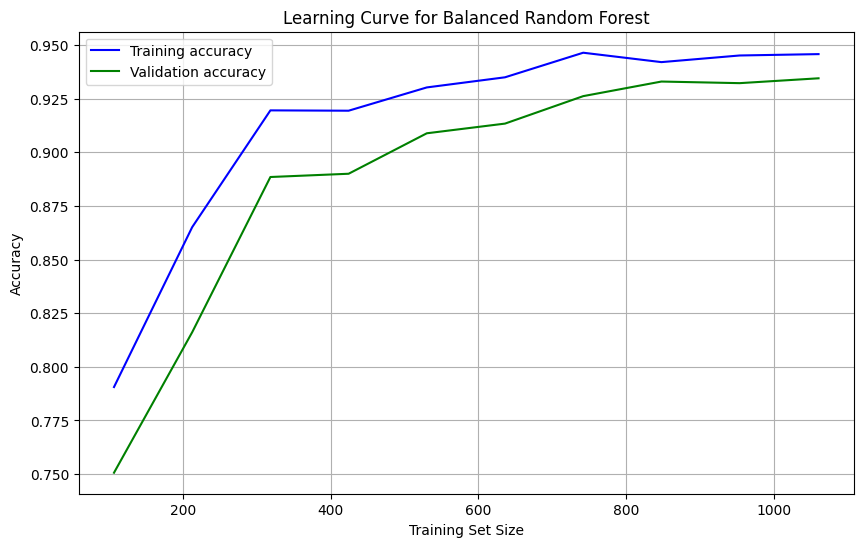

Validation Accuracy: 0.98
Test Accuracy: 0.98

Validation Precision: 0.95
Test Precision: 0.93

Validation Recall: 0.88
Test Recall: 0.93

Validation F1 Score: 0.91
Test F1 Score: 0.93

Validation AUC per class: {0: 1.0, 1: 0.9997899865591398, 2: 0.9762417070109378, 3: 0.999136690647482, 4: 0.9997715851987209}
Test AUC per class: {0: 1.0, 1: 0.9993106617647058, 2: 0.974865831842576, 3: 0.9979904306220095, 4: 0.9998006379585327}

Validation Confusion Matrix:
[[174   0   0   0   0]
 [  0 185   0   1   0]
 [  0   5   7   0   1]
 [  0   0   1  22   2]
 [  0   0   0   0  44]]
Test Confusion Matrix:
[[174   0   0   0   0]
 [  0 184   0   3   0]
 [  0   1  10   1   1]
 [  0   0   2  22   1]
 [  0   0   0   0  44]]

Classification Report (Validation Set):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       174
         1.0       0.97      0.99      0.98       186
         2.0       0.88      0.54      0.67        13
         3.0       0.96  

In [180]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import label_binarize

brf_model = BalancedRandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    class_weight='balanced',
    random_state=42
)

# Fit the model
brf_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_val = brf_model.predict(X_val)
y_pred_test = brf_model.predict(X_test)

# Calculate Accuracy
accuracy_val = accuracy_score(y_val, y_pred_val)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Calculate Precision (using 'macro' for multiclass)
precision_val = precision_score(y_val, y_pred_val, average='macro')
precision_test = precision_score(y_test, y_pred_test, average='macro')

# Calculate Recall (using 'macro' for multiclass)
recall_val = recall_score(y_val, y_pred_val, average='macro')
recall_test = recall_score(y_test, y_pred_test, average='macro')

# Calculate F1 Score (using 'macro' for multiclass)
f1_val = f1_score(y_val, y_pred_val, average='macro')
f1_test = f1_score(y_test, y_pred_test, average='macro')

# Confusion Matrix
cm_val = confusion_matrix(y_val, y_pred_val)
cm_test = confusion_matrix(y_test, y_pred_test)

# Binarize the output for ROC and AUC calculation (one-vs-rest approach)
y_val_bin = label_binarize(y_val, classes=np.unique(y_val))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Calculate ROC Curve and AUC for each class
fpr_val, tpr_val, auc_val = {}, {}, {}
fpr_test, tpr_test, auc_test = {}, {}, {}

for i in range(y_val_bin.shape[1]):  # Loop over each class
    fpr_val[i], tpr_val[i], _ = roc_curve(y_val_bin[:, i], brf_model.predict_proba(X_val)[:, i])
    fpr_test[i], tpr_test[i], _ = roc_curve(y_test_bin[:, i], brf_model.predict_proba(X_test)[:, i])
    auc_val[i] = auc(fpr_val[i], tpr_val[i])
    auc_test[i] = auc(fpr_test[i], tpr_test[i])

# Learning Curve
train_sizes, train_scores, val_scores = learning_curve(
    brf_model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training accuracy', color='blue')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation accuracy', color='green')
plt.title("Learning Curve for Balanced Random Forest")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Print metrics
print(f"Validation Accuracy: {accuracy_val:.2f}")
print(f"Test Accuracy: {accuracy_test:.2f}\n")

print(f"Validation Precision: {precision_val:.2f}")
print(f"Test Precision: {precision_test:.2f}\n")

print(f"Validation Recall: {recall_val:.2f}")
print(f"Test Recall: {recall_test:.2f}\n")

print(f"Validation F1 Score: {f1_val:.2f}")
print(f"Test F1 Score: {f1_test:.2f}\n")

print(f"Validation AUC per class: {auc_val}")
print(f"Test AUC per class: {auc_test}\n")

print(f"Validation Confusion Matrix:\n{cm_val}")
print(f"Test Confusion Matrix:\n{cm_test}")

# Classification Report
print("\nClassification Report (Validation Set):")
print(classification_report(y_val, y_pred_val))

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The BalancedRandomForestClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


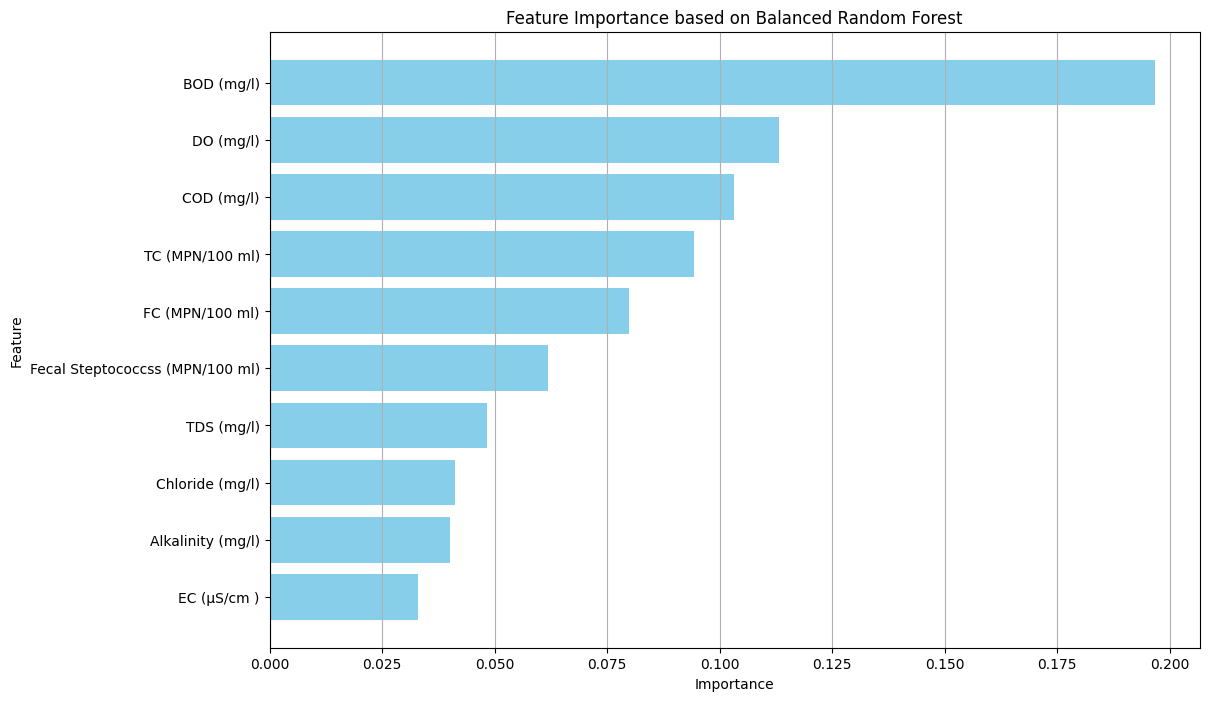

 Features based on Balanced Random Forest Feature Importance:
                            Feature  Importance
10                       BOD (mg/l)    0.196829
4                         DO (mg/l)    0.113219
11                       COD (mg/l)    0.103299
12                  TC (MPN/100 ml)    0.094279
13                  FC (MPN/100 ml)    0.079794
14  Fecal Steptococcss (MPN/100 ml)    0.061879
2                        TDS (mg/l)    0.048382
5                   Chloride (mg/l)    0.041232
9                 Alkalinity (mg/l)    0.040025
3                       EC (µS/cm )    0.032907


In [181]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming brf_model is a trained BalancedRandomForestClassifier and X_train_resampled has feature names

# Get the feature importances
feature_importance = brf_model.feature_importances_

# Create a DataFrame to hold feature names and their importance
importance_df = pd.DataFrame({
    'Feature': X_train_resampled.columns,  # X_train_resampled is the DataFrame with feature names
    'Importance': feature_importance
})

# Sort by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Get the top 10 features
top_10_features = importance_df.head(10)

# Plot top 10 feature importance
plt.figure(figsize=(12, 8))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.title("Feature Importance based on Balanced Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Display most important feature at the top
plt.grid(axis='x')
plt.show()

# Print the top 10 features
print(" Features based on Balanced Random Forest Feature Importance:")
print(top_10_features)


In [182]:
pip install --upgrade scikit-learn


  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:22:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



  2%|▏         | 1/50 [00:00<00:16,  3.04trial/s, best loss: -0.9638009049773756]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:22:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



  4%|▍         | 2/50 [00:01<00:26,  1.81trial/s, best loss: -0.9638009049773756]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:22:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



  6%|▌         | 3/50 [00:01<00:34,  1.36trial/s, best loss: -0.9705882352941176]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:22:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



  8%|▊         | 4/50 [00:03<00:51,  1.11s/trial, best loss: -0.9705882352941176]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:22:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 10%|█         | 5/50 [00:05<00:54,  1.20s/trial, best loss: -0.9705882352941176]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:22:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 12%|█▏        | 6/50 [00:09<01:47,  2.44s/trial, best loss: -0.9705882352941176]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:22:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 14%|█▍        | 7/50 [00:11<01:36,  2.25s/trial, best loss: -0.9705882352941176]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:22:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 16%|█▌        | 8/50 [00:16<02:07,  3.03s/trial, best loss: -0.9705882352941176]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:22:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 18%|█▊        | 9/50 [00:24<03:08,  4.61s/trial, best loss: -0.9705882352941176]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:22:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 20%|██        | 10/50 [00:25<02:23,  3.58s/trial, best loss: -0.9796380090497737]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:22:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 22%|██▏       | 11/50 [00:28<02:13,  3.42s/trial, best loss: -0.9796380090497737]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 24%|██▍       | 12/50 [00:32<02:17,  3.61s/trial, best loss: -0.9796380090497737]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 26%|██▌       | 13/50 [00:34<01:47,  2.91s/trial, best loss: -0.9796380090497737]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 28%|██▊       | 14/50 [00:36<01:34,  2.62s/trial, best loss: -0.9796380090497737]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 30%|███       | 15/50 [00:38<01:29,  2.54s/trial, best loss: -0.9796380090497737]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 32%|███▏      | 16/50 [00:38<01:03,  1.87s/trial, best loss: -0.9796380090497737]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 34%|███▍      | 17/50 [00:39<00:46,  1.42s/trial, best loss: -0.9796380090497737]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 36%|███▌      | 18/50 [00:39<00:38,  1.20s/trial, best loss: -0.9796380090497737]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 38%|███▊      | 19/50 [00:40<00:30,  1.00trial/s, best loss: -0.9796380090497737]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 40%|████      | 20/50 [00:40<00:23,  1.28trial/s, best loss: -0.9796380090497737]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 42%|████▏     | 21/50 [00:41<00:20,  1.42trial/s, best loss: -0.9819004524886877]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 44%|████▍     | 22/50 [00:41<00:17,  1.56trial/s, best loss: -0.9819004524886877]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 46%|████▌     | 23/50 [00:42<00:15,  1.75trial/s, best loss: -0.9819004524886877]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 48%|████▊     | 24/50 [00:42<00:14,  1.80trial/s, best loss: -0.9819004524886877]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 50%|█████     | 25/50 [00:43<00:12,  1.98trial/s, best loss: -0.9819004524886877]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 52%|█████▏    | 26/50 [00:43<00:12,  1.99trial/s, best loss: -0.9819004524886877]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 54%|█████▍    | 27/50 [00:44<00:11,  1.94trial/s, best loss: -0.9819004524886877]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 56%|█████▌    | 28/50 [00:44<00:11,  2.00trial/s, best loss: -0.9819004524886877]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 58%|█████▊    | 29/50 [00:45<00:11,  1.81trial/s, best loss: -0.9819004524886877]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 60%|██████    | 30/50 [00:45<00:10,  1.99trial/s, best loss: -0.9819004524886877]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 62%|██████▏   | 31/50 [00:46<00:09,  1.97trial/s, best loss: -0.9819004524886877]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 64%|██████▍   | 32/50 [00:46<00:07,  2.27trial/s, best loss: -0.9819004524886877]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 66%|██████▌   | 33/50 [00:46<00:07,  2.37trial/s, best loss: -0.9819004524886877]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 68%|██████▊   | 34/50 [00:47<00:07,  2.04trial/s, best loss: -0.9819004524886877]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 70%|███████   | 35/50 [00:47<00:06,  2.17trial/s, best loss: -0.9819004524886877]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 72%|███████▏  | 36/50 [00:48<00:06,  2.17trial/s, best loss: -0.9819004524886877]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 74%|███████▍  | 37/50 [00:48<00:05,  2.21trial/s, best loss: -0.9819004524886877]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 76%|███████▌  | 38/50 [00:49<00:07,  1.61trial/s, best loss: -0.9819004524886877]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 78%|███████▊  | 39/50 [00:51<00:10,  1.07trial/s, best loss: -0.9819004524886877]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 80%|████████  | 40/50 [00:52<00:10,  1.10s/trial, best loss: -0.9819004524886877]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 82%|████████▏ | 41/50 [00:53<00:08,  1.07trial/s, best loss: -0.9819004524886877]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 84%|████████▍ | 42/50 [00:53<00:06,  1.30trial/s, best loss: -0.9819004524886877]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 86%|████████▌ | 43/50 [00:54<00:05,  1.38trial/s, best loss: -0.9819004524886877]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 88%|████████▊ | 44/50 [00:54<00:03,  1.57trial/s, best loss: -0.9819004524886877]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 90%|█████████ | 45/50 [00:55<00:02,  1.76trial/s, best loss: -0.9819004524886877]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 92%|█████████▏| 46/50 [00:55<00:01,  2.08trial/s, best loss: -0.9819004524886877]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 94%|█████████▍| 47/50 [00:56<00:01,  1.78trial/s, best loss: -0.9819004524886877]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 96%|█████████▌| 48/50 [00:56<00:01,  1.71trial/s, best loss: -0.9819004524886877]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



100%|██████████| 50/50 [00:57<00:00,  1.15s/trial, best loss: -0.9819004524886877]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

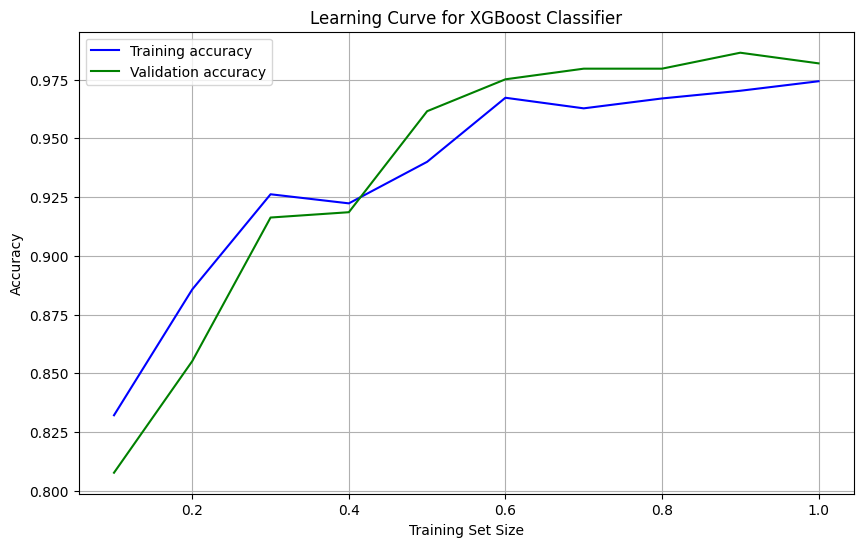

Validation Accuracy: 0.98
Test Accuracy: 0.97

Validation Precision: 0.94
Test Precision: 0.88

Validation Recall: 0.93
Test Recall: 0.94

Validation F1 Score: 0.93
Test F1 Score: 0.90

Validation AUC per class: {0: 1.0, 1: 0.9992019489247311, 2: 0.9743589743589743, 3: 0.9987529976019185, 4: 0.9994289629968023}
Test AUC per class: {0: 0.9999786352177071, 1: 0.9975142045454546, 2: 0.9685152057245079, 3: 0.9980861244019138, 4: 0.9988038277511961}

Validation Confusion Matrix:
[[174   0   0   0   0]
 [  0 183   1   2   0]
 [  1   0   9   2   1]
 [  0   1   0  24   0]
 [  0   0   0   0  44]]
Test Confusion Matrix:
[[174   0   0   0   0]
 [  1 175   8   3   0]
 [  0   1  10   1   1]
 [  0   0   0  25   0]
 [  0   0   0   0  44]]

Classification Report (Validation Set):
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       174
         1.0       0.99      0.98      0.99       186
         2.0       0.90      0.69      0.78        13
        

In [183]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import label_binarize
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

# Assuming X_train_resampled, y_train_resampled, X_val, y_val, X_test, and y_test are predefined

# Define the hyperparameter space for Hyperopt
space = {
    'max_depth': hp.quniform("max_depth", 3, 18, 1),
    'gamma': hp.uniform('gamma', 1, 9),
    'reg_alpha': hp.quniform('reg_alpha', 40, 180, 1),
    'reg_lambda': hp.uniform('reg_lambda', 0, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'min_child_weight': hp.quniform('min_child_weight', 0, 10, 1),
    'n_estimators': hp.quniform('n_estimators', 100, 500, 1),  # Added n_estimators to the search space
    'seed': 0
}
def objective(space):
    clf = xgb.XGBClassifier(
        n_estimators=int(space['n_estimators']),
        max_depth=int(space['max_depth']),
        gamma=space['gamma'],
        reg_alpha=int(space['reg_alpha']),
        reg_lambda=space['reg_lambda'],
        min_child_weight=int(space['min_child_weight']),
        colsample_bytree=space['colsample_bytree'],
        use_label_encoder=False,
        eval_metric="mlogloss",
        random_state=42
    )

    clf.fit(X_train_resampled, y_train_resampled)

    y_pred_val = clf.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred_val)

    return {'loss': -accuracy, 'status': STATUS_OK}

trials = Trials()
best_params = fmin(fn=objective,
                   space=space,
                   algo=tpe.suggest,
                   max_evals=50,
                   trials=trials)

best_model = xgb.XGBClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    gamma=best_params['gamma'],
    reg_alpha=int(best_params['reg_alpha']),
    reg_lambda=best_params['reg_lambda'],
    min_child_weight=int(best_params['min_child_weight']),
    colsample_bytree=best_params['colsample_bytree'],
    use_label_encoder=False,
    eval_metric="mlogloss",
    random_state=42
)

# Fit the best model on the resampled training data
best_model.fit(X_train_resampled, y_train_resampled)

# Predictions on validation and test set
y_pred_val = best_model.predict(X_val)
y_pred_test = best_model.predict(X_test)

# Calculate Accuracy
accuracy_val = accuracy_score(y_val, y_pred_val)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Calculate Precision (using 'macro' for multiclass)
precision_val = precision_score(y_val, y_pred_val, average='macro')
precision_test = precision_score(y_test, y_pred_test, average='macro')

# Calculate Recall (using 'macro' for multiclass)
recall_val = recall_score(y_val, y_pred_val, average='macro')
recall_test = recall_score(y_test, y_pred_test, average='macro')

# Calculate F1 Score (using 'macro' for multiclass)
f1_val = f1_score(y_val, y_pred_val, average='macro')
f1_test = f1_score(y_test, y_pred_test, average='macro')

# Confusion Matrix
cm_val = confusion_matrix(y_val, y_pred_val)
cm_test = confusion_matrix(y_test, y_pred_test)

# Binarize the output for ROC and AUC calculation (one-vs-rest approach)
y_val_bin = label_binarize(y_val, classes=np.unique(y_val))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Calculate ROC Curve and AUC for each class
fpr_val, tpr_val, auc_val = {}, {}, {}
fpr_test, tpr_test, auc_test = {}, {}, {}

for i in range(y_val_bin.shape[1]):  # Loop over each class
    fpr_val[i], tpr_val[i], _ = roc_curve(y_val_bin[:, i], best_model.predict_proba(X_val)[:, i])
    fpr_test[i], tpr_test[i], _ = roc_curve(y_test_bin[:, i], best_model.predict_proba(X_test)[:, i])
    auc_val[i] = auc(fpr_val[i], tpr_val[i])
    auc_test[i] = auc(fpr_test[i], tpr_test[i])

# Learning Curve - Manual Calculation
train_sizes = np.linspace(0.1, 1.0, 10)  # Define the training sizes you want to use
train_scores = []
val_scores = []

# Use the original training set without re-splitting
for train_size in train_sizes:
    # Determine the subset of training data
    X_train_sub = X_train_resampled[:int(train_size * len(X_train_resampled))]
    y_train_sub = y_train_resampled[:int(train_size * len(y_train_resampled))]

    # Fit the model on the subset
    best_model.fit(X_train_sub, y_train_sub)

    # Calculate training accuracy
    train_accuracy = accuracy_score(y_train_sub, best_model.predict(X_train_sub))
    train_scores.append(train_accuracy)

    # Calculate validation accuracy
    val_accuracy = accuracy_score(y_val, best_model.predict(X_val))
    val_scores.append(val_accuracy)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, label='Training accuracy', color='blue')
plt.plot(train_sizes, val_scores, label='Validation accuracy', color='green')
plt.title("Learning Curve for XGBoost Classifier")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Print metrics
print(f"Validation Accuracy: {accuracy_val:.2f}")
print(f"Test Accuracy: {accuracy_test:.2f}\n")

print(f"Validation Precision: {precision_val:.2f}")
print(f"Test Precision: {precision_test:.2f}\n")

print(f"Validation Recall: {recall_val:.2f}")
print(f"Test Recall: {recall_test:.2f}\n")

print(f"Validation F1 Score: {f1_val:.2f}")
print(f"Test F1 Score: {f1_test:.2f}\n")

print(f"Validation AUC per class: {auc_val}")
print(f"Test AUC per class: {auc_test}\n")

print(f"Validation Confusion Matrix:\n{cm_val}")
print(f"Test Confusion Matrix:\n{cm_test}")

# Classification Report
print("\nClassification Report (Validation Set):")
print(classification_report(y_val, y_pred_val))

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test))

In [184]:
print("The best hyperparameters are : ","\n")
print(best_params)

The best hyperparameters are :  

{'colsample_bytree': 0.6450688398533617, 'gamma': 1.0556783224980908, 'max_depth': 9.0, 'min_child_weight': 6.0, 'n_estimators': 325.0, 'reg_alpha': 42.0, 'reg_lambda': 0.4407364644440856}


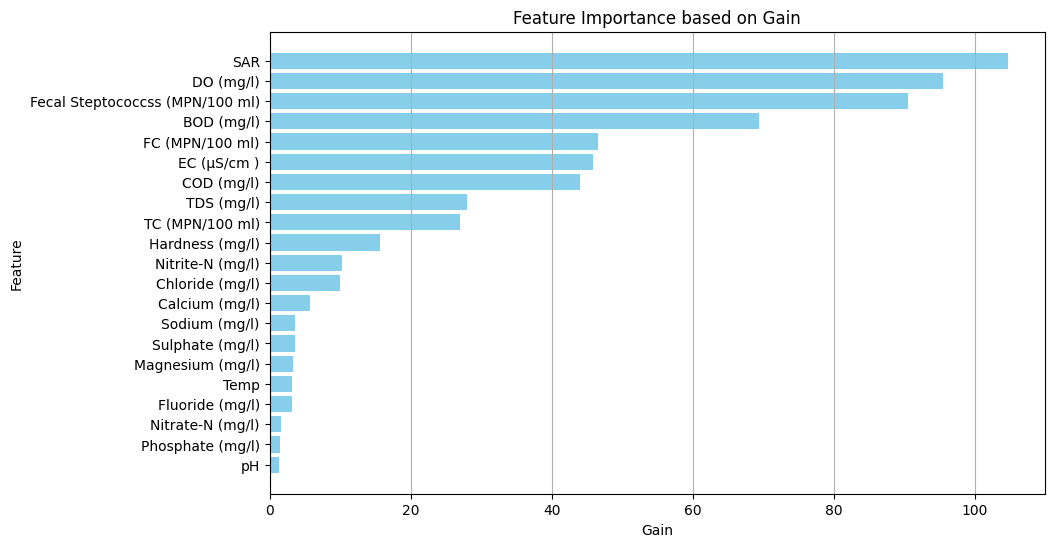

In [185]:
# Feature importance analysis
import pandas as pd
import matplotlib.pyplot as plt

# Assuming best_model is already trained
feature_importance = best_model.get_booster().get_score(importance_type='gain')
importance_df = pd.DataFrame(
    {'Feature': feature_importance.keys(), 'Importance': feature_importance.values()}
)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title("Feature Importance based on Gain")
plt.xlabel("Gain")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()


df1 = pd.read_excel('/content/output_file.xlsx')
df1 = df1.drop(columns=["Month"], errors='ignore')
X = df1.drop(columns='DBU')
y = df1['DBU']
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:23:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


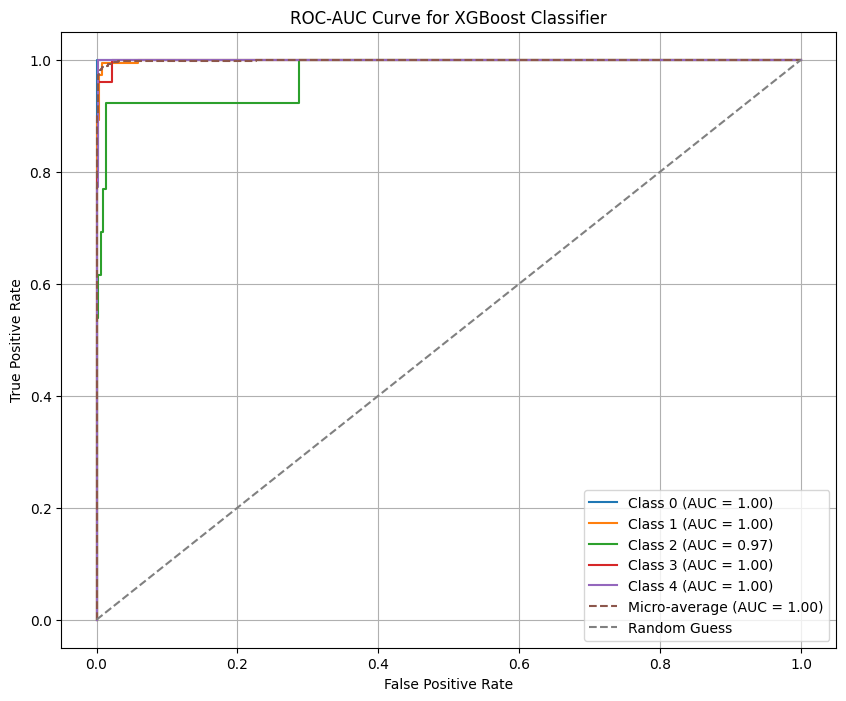

In [186]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the labels for multiclass ROC-AUC
y_train_bin = label_binarize(y_train_resampled, classes=np.unique(y_train_resampled))
y_val_bin = label_binarize(y_val, classes=np.unique(y_val))

# Fit the best model
best_model.fit(X_train_resampled, y_train_resampled)

# Predict probabilities for validation set
y_pred_proba_val = best_model.predict_proba(X_val)

# Calculate ROC and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(y_val_bin.shape[1]):  # Loop through each class
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_pred_proba_val[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calculate micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_val_bin.ravel(), y_pred_proba_val.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the ROC curves
plt.figure(figsize=(10, 8))
for i in range(y_val_bin.shape[1]):  # Plot each class curve
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"], label=f"Micro-average (AUC = {roc_auc['micro']:.2f})", linestyle='--')

# Plot the random guess line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Guess")

# Add labels, legend, and title
plt.title("ROC-AUC Curve for XGBoost Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


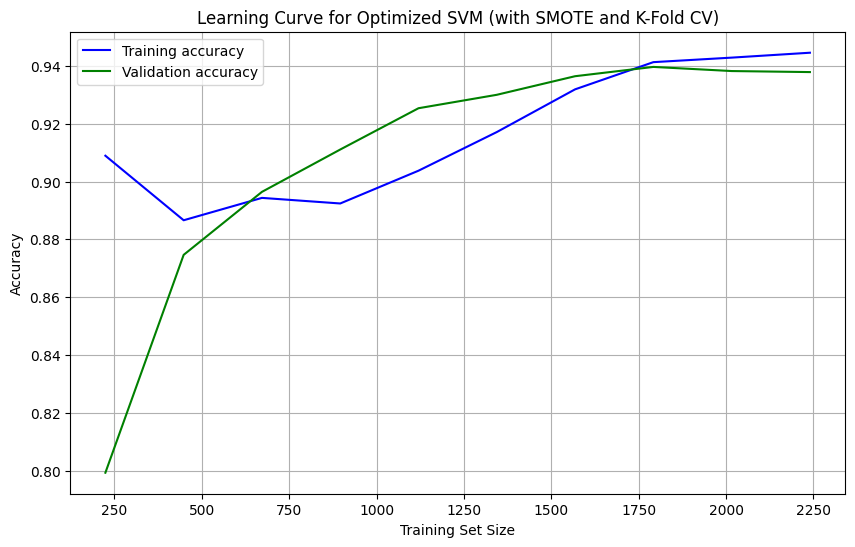

Validation Accuracy: 0.88
Test Accuracy: 0.88

Validation Precision: 0.75
Test Precision: 0.77

Validation Recall: 0.79
Test Recall: 0.85

Validation F1 Score: 0.77
Test F1 Score: 0.80

Validation Confusion Matrix:
[[170   4   0   0   0]
 [ 17 154   8   7   0]
 [  0   4   6   2   1]
 [  0   2   0  18   5]
 [  0   0   0   2  42]]
Test Confusion Matrix:
[[170   4   0   0   0]
 [ 16 151  16   4   0]
 [  0   1   9   2   1]
 [  0   2   1  20   2]
 [  0   0   0   2  42]]

Classification Report (Validation Set):
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94       174
         1.0       0.94      0.83      0.88       186
         2.0       0.43      0.46      0.44        13
         3.0       0.62      0.72      0.67        25
         4.0       0.88      0.95      0.91        44

    accuracy                           0.88       442
   macro avg       0.75      0.79      0.77       442
weighted avg       0.89      0.88      0.88       442



In [187]:
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
svm_model = SVC(class_weight='balanced',
                random_state=42, C=1,
                kernel='rbf',
                gamma='scale', probability=True)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(svm_model, X_train_resampled, y_train_resampled, cv=kf, scoring='accuracy')

svm_model.fit(X_train_resampled, y_train_resampled)

# Predictions on validation and test sets
y_pred_val = svm_model.predict(X_val)
y_pred_test = svm_model.predict(X_test)

# Accuracy calculation
accuracy_val = accuracy_score(y_val, y_pred_val)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Precision, Recall, and F1-Score (using 'macro' for multiclass)
precision_val = precision_score(y_val, y_pred_val, average='macro')
precision_test = precision_score(y_test, y_pred_test, average='macro')

recall_val = recall_score(y_val, y_pred_val, average='macro')
recall_test = recall_score(y_test, y_pred_test, average='macro')

f1_val = f1_score(y_val, y_pred_val, average='macro')
f1_test = f1_score(y_test, y_pred_test, average='macro')

# Confusion Matrix
cm_val = confusion_matrix(y_val, y_pred_val)
cm_test = confusion_matrix(y_test, y_pred_test)

# Learning curve
train_sizes, train_scores, val_scores = learning_curve(
    svm_model, X_train_resampled, y_train_resampled, train_sizes=np.linspace(0.1, 1.0, 10), cv=kf
)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training accuracy', color='blue')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation accuracy', color='green')
plt.title("Learning Curve for Optimized SVM (with SMOTE and K-Fold CV)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Print metrics
print(f"Validation Accuracy: {accuracy_val:.2f}")
print(f"Test Accuracy: {accuracy_test:.2f}\n")

print(f"Validation Precision: {precision_val:.2f}")
print(f"Test Precision: {precision_test:.2f}\n")

print(f"Validation Recall: {recall_val:.2f}")
print(f"Test Recall: {recall_test:.2f}\n")

print(f"Validation F1 Score: {f1_val:.2f}")
print(f"Test F1 Score: {f1_test:.2f}\n")

print(f"Validation Confusion Matrix:\n{cm_val}")
print(f"Test Confusion Matrix:\n{cm_test}")

# Classification Report
print("\nClassification Report (Validation Set):")
print(classification_report(y_val, y_pred_val))

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test))

# Cross-validation and accuracy results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")


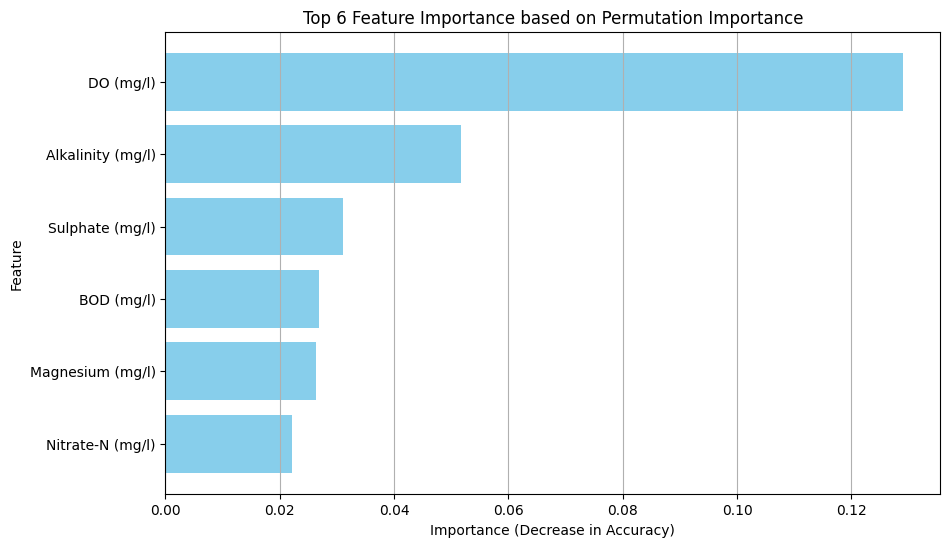

Top 6 Features based on Permutation Importance:
              Feature  Importance
4           DO (mg/l)    0.129120
9   Alkalinity (mg/l)    0.051693
17    Sulphate (mg/l)    0.031151
10         BOD (mg/l)    0.026862
8    Magnesium (mg/l)    0.026411
15   Nitrate-N (mg/l)    0.022122


In [188]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

# Assuming svm_model is already trained, and X_test, y_test are your validation/test data

# Compute permutation importance
result = permutation_importance(svm_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Create a DataFrame with feature names and importance scores
importance_df = pd.DataFrame(
    {'Feature': X_test.columns, 'Importance': result.importances_mean}
)

# Sort by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Get the top 6 most important features
top_6_features = importance_df.head(6)

# Plot top 6 feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_6_features['Feature'], top_6_features['Importance'], color='skyblue')
plt.title("Top 6 Feature Importance based on Permutation Importance")
plt.xlabel("Importance (Decrease in Accuracy)")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Display most important feature at the top
plt.grid(axis='x')
plt.show()

# Print the top 6 features
print("Top 6 Features based on Permutation Importance:")
print(top_6_features)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The BalancedRandomForestClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The BalancedRandomForestClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn

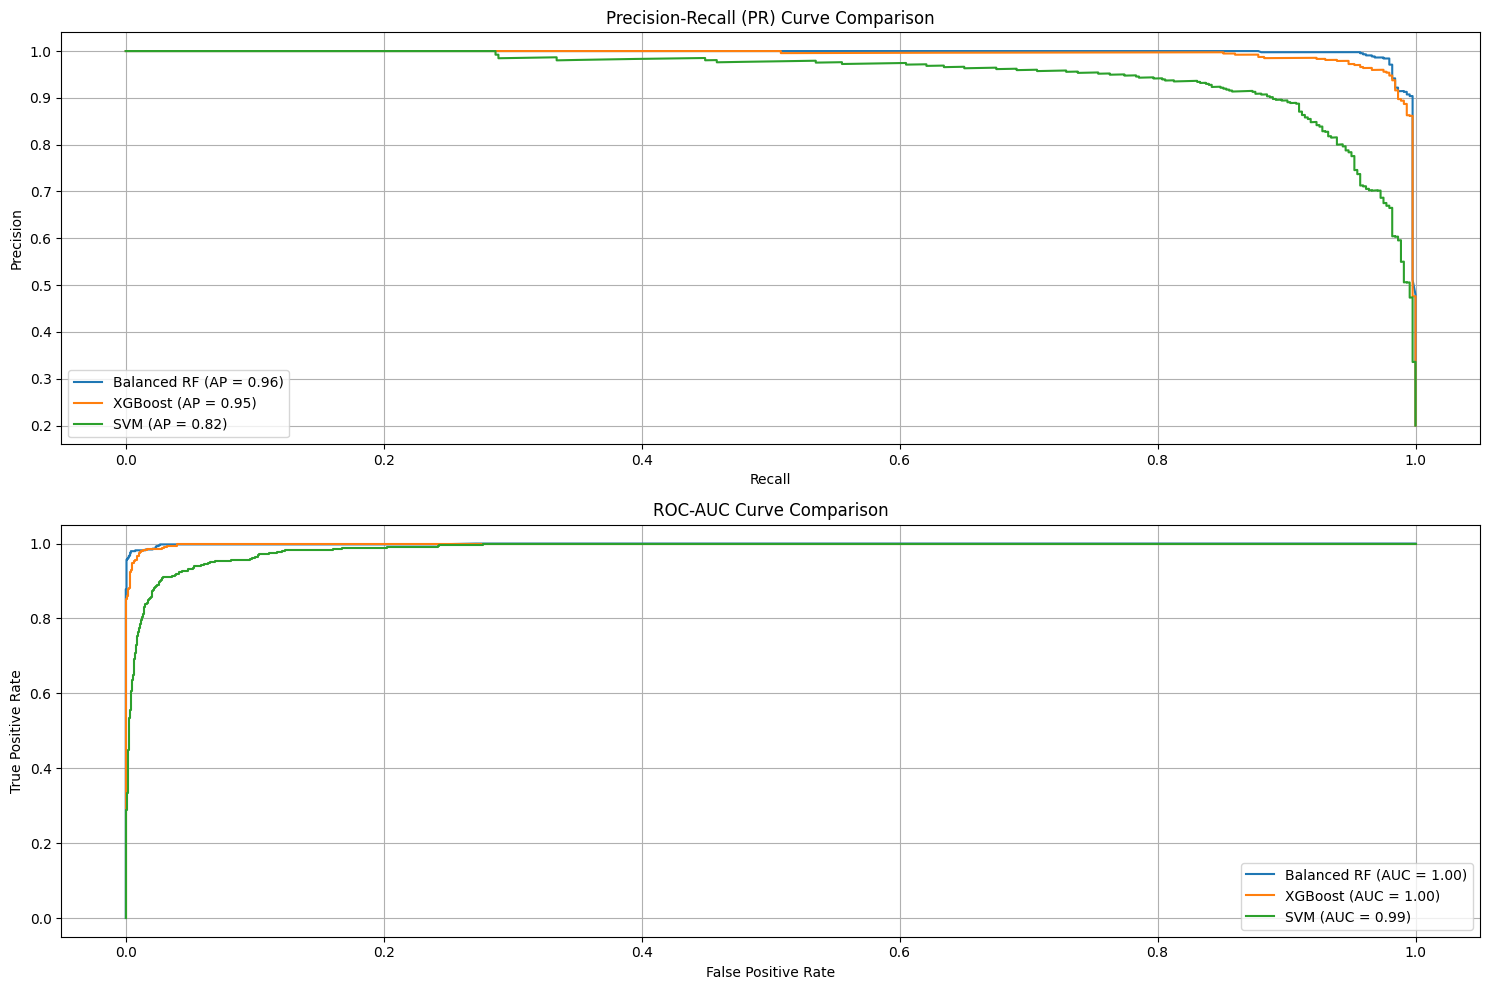

In [189]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc, average_precision_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize figure for PR and ROC-AUC curves
plt.figure(figsize=(15, 10))

# **Subplot for PR Curves**
plt.subplot(2, 1, 1)
plt.title("Precision-Recall (PR) Curve Comparison")

for model_name, model in [
    ("Balanced RF", brf_model),
    ("XGBoost", best_model),
    ("SVM", svm_model)
]:
    # Get prediction probabilities or decision scores
    if hasattr(model, "predict_proba"):  # For models with predict_proba
        y_scores = model.predict_proba(X_test)
    elif hasattr(model, "decision_function"):  # For models with decision_function
        y_scores = model.decision_function(X_test)
    else:
        raise AttributeError(f"Model {model_name} does not support probability or decision function output.")

    # Calculate average precision across all classes
    avg_precision = average_precision_score(y_test_bin, y_scores, average="macro")

    # Compute a macro-average PR curve
    precision, recall, _ = precision_recall_curve(y_test_bin.ravel(), y_scores.ravel())
    plt.plot(recall, precision, label=f"{model_name} (AP = {avg_precision:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="best")
plt.grid(True)

# **Subplot for ROC-AUC Curves**
plt.subplot(2, 1, 2)
plt.title("ROC-AUC Curve Comparison")

for model_name, model in [
    ("Balanced RF", brf_model),
    ("XGBoost", best_model),
    ("SVM", svm_model)
]:
    # Get prediction probabilities or decision scores
    if hasattr(model, "predict_proba"):  # For models with predict_proba
        y_scores = model.predict_proba(X_test)
    elif hasattr(model, "decision_function"):  # For models with decision_function
        y_scores = model.decision_function(X_test)
    else:
        raise AttributeError(f"Model {model_name} does not support probability or decision function output.")

    # Compute a macro-average ROC curve
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_scores.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.grid(True)

plt.tight_layout()
plt.show()
